In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

from pylab import rcParams
from numpy import diff
from scipy import interpolate
import scipy.stats as stats
from scipy.interpolate import CubicSpline


from scipy.signal import savgol_filter
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

import matplotlib.gridspec as gridspec
from IPython.display import display, Math
from sklearn.metrics import r2_score

from statistics import mean, median


In [2]:
df_iron = pd.read_csv('../Dissertation_projects/Data/IRON/Iron.csv', sep=',', index_col=0)

#make all the spots labeled NA a nan value
df_iron = df_iron.replace('NA', np.nan)
df_iron = df_iron.replace('NA ', np.nan)

#make all BDL a 0 
df_iron.loc[df_iron['FeT_uM'] == 'BLD', 'FeT_uM'] = 0
df_iron.loc[df_iron['Fe2_uM'] == 'BLD', 'Fe2_uM'] = 0

# convert columns to numeric data type
df_iron['FeT_uM'] = pd.to_numeric(df_iron['FeT_uM'], errors='coerce')
df_iron['Fe2_uM'] = pd.to_numeric(df_iron['Fe2_uM'], errors='coerce')

df_iron['FeT_uM'] = df_iron['FeT_uM'].where(pd.notna(df_iron['FeT_uM']), other=np.nan)
df_iron['Fe2_uM'] = df_iron['Fe2_uM'].where(pd.notna(df_iron['Fe2_uM']), other=np.nan)

#make all negative a 0 
df_iron.loc[df_iron['FeT_uM'] < 0, 'FeT_uM'] = 0
df_iron.loc[df_iron['Fe2_uM'] < 0, 'Fe2_uM'] = 0

#calculate Fe +3 
df_iron['Fe3_uM'] = df_iron['FeT_uM'] - df_iron['Fe2_uM']
df_iron.loc[df_iron['Fe3_uM'] < 0, 'Fe3_uM'] = 0
df_iron.loc[df_iron['Fe2_uM'] > df_iron['FeT_uM'], 'Fe3_uM'] = 0
df_iron['Fe3_uM'] = pd.to_numeric(df_iron['Fe3_uM'], errors='coerce')
df_iron['Fe3_uM'] = df_iron['Fe3_uM'].where(pd.notna(df_iron['Fe3_uM']), other=np.nan)

#time feild 
df_iron['Fe2_Time'] = pd.to_numeric(df_iron['Fe2_Time'], errors='coerce')
df_iron['Fe2_Time'] = df_iron['Fe2_Time'].where(pd.notna(df_iron['Fe2_Time']), other=np.nan)

#time feild 
df_iron['FeT_Time'] = pd.to_numeric(df_iron['FeT_Time'], errors='coerce')
df_iron['FeT_Time'] = df_iron['FeT_Time'].where(pd.notna(df_iron['FeT_Time']), other=np.nan)

# convert columns to numeric data type
df_iron['FeT_Depth'] = pd.to_numeric(df_iron['Fe2_Depth'], errors='coerce')
df_iron['Fe2_Depth'] = pd.to_numeric(df_iron['Fe2_Depth'], errors='coerce')

df_iron['FeT_uM'] = df_iron['FeT_uM'].replace(0, np.nan)
df_iron['Fe2_uM'] = df_iron['Fe2_uM'].replace(0, np.nan)
df_iron['Fe3_uM'] = df_iron['Fe3_uM'].replace(0, np.nan)


df_iron['code'] = df_iron['Location'] + '_' + df_iron['Campaign']

In [3]:
df_doc = pd.read_csv('../Dissertation_projects/Data/TOC/TOC_GOM.csv', sep=',', index_col=0)

#make all BDL a 0 
df_doc.loc[df_doc['NPOC_uM'] == 'BLD', 'NPOC_uM'] = 0
df_doc.loc[df_doc['TN_uM'] == 'BLD', 'TN_uM'] = 0

df_doc.loc[df_doc['NPOC_uM'] < 0, 'NPOC_uM'] = 0
df_doc.loc[df_doc['TN_uM'] < 0, 'TN_uM'] = 0

#fix date time 
df_doc['date_time'] = pd.to_datetime(df_doc['Date'])
df_doc['Date'] = df_doc['date_time'].dt.date

df_doc['NPOC_uM'] = pd.to_numeric(df_doc['NPOC_uM'], errors='coerce')
df_doc['NPOC_uM'] = df_doc['NPOC_uM'].where(pd.notna(df_doc['NPOC_uM']), other=np.nan)

df_doc['TN_uM'] = pd.to_numeric(df_doc['TN_uM'], errors='coerce')
df_doc['TN_uM'] = df_doc['TN_uM'].where(pd.notna(df_doc['TN_uM']), other=np.nan)

df_doc['Time'] = pd.to_numeric(df_doc['Time'], errors='coerce')
df_doc['Time'] = df_doc['Time'].where(pd.notna(df_doc['Time']), other=np.nan)

df_doc['NPOC_uM'] = df_doc['NPOC_uM'].replace(0, np.nan)
df_doc['TN_uM'] = df_doc['TN_uM'].replace(0, np.nan)

df_doc['code'] = df_doc['Location'] + '_' + df_doc['Campaign']

df_doc = df_doc.drop(222101, axis=0)
df_doc = df_doc.drop(212211, axis=0)
df_doc = df_doc.drop(214311, axis=0)
df_doc = df_doc.drop(214317, axis=0)
df_doc = df_doc.drop(221710, axis=0)

In [4]:
df_meta = pd.read_csv('../Dissertation_projects/Data/meta_data.csv', sep=',', index_col=0)

#fix date time 
df_meta['date_time'] = pd.to_datetime(df_meta['Date'])
df_meta['Date'] = df_meta['date_time'].dt.date

df_meta['code'] = df_meta['Station'] + '_' + df_meta['Trip']

In [5]:
df_c = pd.read_csv('../Dissertation_projects/Data/CDOM/Outputs.csv', sep=',', index_col=0)

# Ensure that the indices are of the same type
df_c.index = df_c.index.astype(str)
df_meta.index = df_meta.index.astype(str)

# Concatenate the DataFrames
df_cdom = df_c.merge(df_meta, left_index=True, right_index=True)

In [6]:
df_spectra_pw = pd.read_csv('../Dissertation_projects/Data/CDOM/sprectra_pchip_baseline_corrected_PW.csv',sep=',', index_col=0)
df_spectra_rz = pd.read_csv('../Dissertation_projects/Data/CDOM/sprectra_pchip_baseline_corrected_RZ.csv',sep=',', index_col=0)

df_spectra_pw.columns = ['a' + col for col in df_spectra_pw.columns]
df_spectra_rz.columns = ['a' + col for col in df_spectra_rz.columns]

df_spectra_pw.index = df_spectra_pw.index.astype(str)
df_spectra_rz.index = df_spectra_rz.index.astype(str)
df_meta.index = df_meta.index.astype(str)

df_spectra_pw = df_spectra_pw.merge(df_meta, left_index=True, right_index=True)
df_spectra_rz = df_spectra_rz.merge(df_meta, left_index=True, right_index=True)

In [7]:
#get PW data sets 
df_cdom_pw = df_cdom[df_cdom['Type'] == 'PW']
df_iron_pw = df_iron[df_iron['Type'] == 'PW']
df_doc_pw = df_doc[df_doc['Type'] == 'PW']

df_doc_pw = df_doc_pw[df_doc_pw['code'] != "St.9_GOM2021"]
df_doc_pw = df_doc_pw[df_doc_pw['code'] != "St.5B_GOM2021"]
df_doc_pw = df_doc_pw[df_doc_pw['code'] != "St.4_GOM2021"]


#get RHZ data 
df_cdom_rz = df_cdom[df_cdom['Type'] == 'RHZ']
df_iron_rz = df_iron[df_iron['Type'].isin(['RZ', 'GBRZ'])]
df_doc_rz = df_doc[df_doc['Type'] == 'RZ']

In [8]:
df_ncs = pd.read_csv('../Dissertation_projects/Data/CNS/NCS_data.csv',sep=',', index_col=0)

df_ncs['OC_gpcm3'] = df_ncs['OC_g/cm3'] 
df_ncs['N_gpcm3'] = df_ncs['N_g/cm3'] 
df_ncs['S_gpcm3'] = df_ncs['S_g/cm3'] 

df_ncs['OC_mmolpcm3'] = df_ncs['OC_gpcm3'] / 12 * 1000
df_ncs['N_mmolpcm3'] = df_ncs['N_gpcm3'] / 14 * 1000
df_ncs['S_mmolpcm3'] = df_ncs['S_gpcm3'] / 32 * 1000


df_ncs['code'] = df_ncs['Station'] + '_' + df_ncs['Trip']

In [9]:
df_note = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Station_summary.csv',sep=',', index_col=0)
df_note['Date'] = pd.to_datetime(df_note['date'])

In [10]:
df_doc_flux = pd.read_csv('../Dissertation_projects/Data/Stats_data_sets/Flux_doc_pw.csv',sep=',', index_col=0)

In [11]:
# Get unique codes from df_doc_pw and df_cdom_pw
unique_codes_doc = np.sort(df_doc_pw['code'].unique())
unique_codes_cdom = np.sort(df_cdom_pw['code'].unique())
unique_codes_iron = np.sort(df_iron_pw['code'].unique())

# Concatenate unique codes
codes_list = np.concatenate((unique_codes_doc, unique_codes_cdom, unique_codes_iron))
codes_list = np.unique(codes_list)
print(len(codes_list))
print(codes_list)


44
['St.11_GOM2021' 'St.11_GOM21FA' 'St.11_GOM22SU' 'St.12_GOM21FA'
 'St.12_GOM22SU' 'St.13_GOM21FA' 'St.13_GOM22SP' 'St.13_GOM22SU'
 'St.14_GOM2021' 'St.14_GOM21FA' 'St.14_GOM22SP' 'St.14_GOM22SU'
 'St.15_GOM2021' 'St.15_GOM21FA' 'St.15_GOM22SP' 'St.15_GOM22SU'
 'St.16_GOM2021' 'St.16_GOM21FA' 'St.16_GOM22SP' 'St.16_GOM22SU'
 'St.2_GOM2021' 'St.2_GOM21FA' 'St.2_GOM22SP' 'St.2_GOM22SU'
 'St.4_GOM2021' 'St.4_GOM21FA' 'St.4_GOM22SP' 'St.4_GOM22SU'
 'St.5B_GOM2021' 'St.5B_GOM21FA' 'St.5B_GOM22SP' 'St.5B_GOM22SU'
 'St.7_GOM2021' 'St.7_GOM21FA' 'St.7_GOM22SP' 'St.7_GOM22SU'
 'St.9_GOM2021' 'St.9_GOM21FA' 'St.9_GOM22SP' 'St.9_GOM22SU'
 'St.MK_GOM2021' 'St.MK_GOM21FA' 'St.MK_GOM22SP' 'St.MK_GOM22SU']


In [12]:
unique_codes_doc

array(['St.11_GOM2021', 'St.11_GOM21FA', 'St.11_GOM22SU', 'St.12_GOM21FA',
       'St.12_GOM22SU', 'St.13_GOM21FA', 'St.13_GOM22SP', 'St.13_GOM22SU',
       'St.14_GOM2021', 'St.14_GOM21FA', 'St.14_GOM22SP', 'St.14_GOM22SU',
       'St.15_GOM2021', 'St.15_GOM21FA', 'St.15_GOM22SP', 'St.15_GOM22SU',
       'St.16_GOM2021', 'St.16_GOM21FA', 'St.16_GOM22SP', 'St.16_GOM22SU',
       'St.2_GOM2021', 'St.2_GOM21FA', 'St.2_GOM22SP', 'St.2_GOM22SU',
       'St.4_GOM21FA', 'St.4_GOM22SP', 'St.4_GOM22SU', 'St.5B_GOM21FA',
       'St.5B_GOM22SP', 'St.5B_GOM22SU', 'St.7_GOM2021', 'St.7_GOM21FA',
       'St.7_GOM22SP', 'St.7_GOM22SU', 'St.9_GOM21FA', 'St.9_GOM22SP',
       'St.9_GOM22SU', 'St.MK_GOM2021', 'St.MK_GOM21FA', 'St.MK_GOM22SP',
       'St.MK_GOM22SU'], dtype=object)

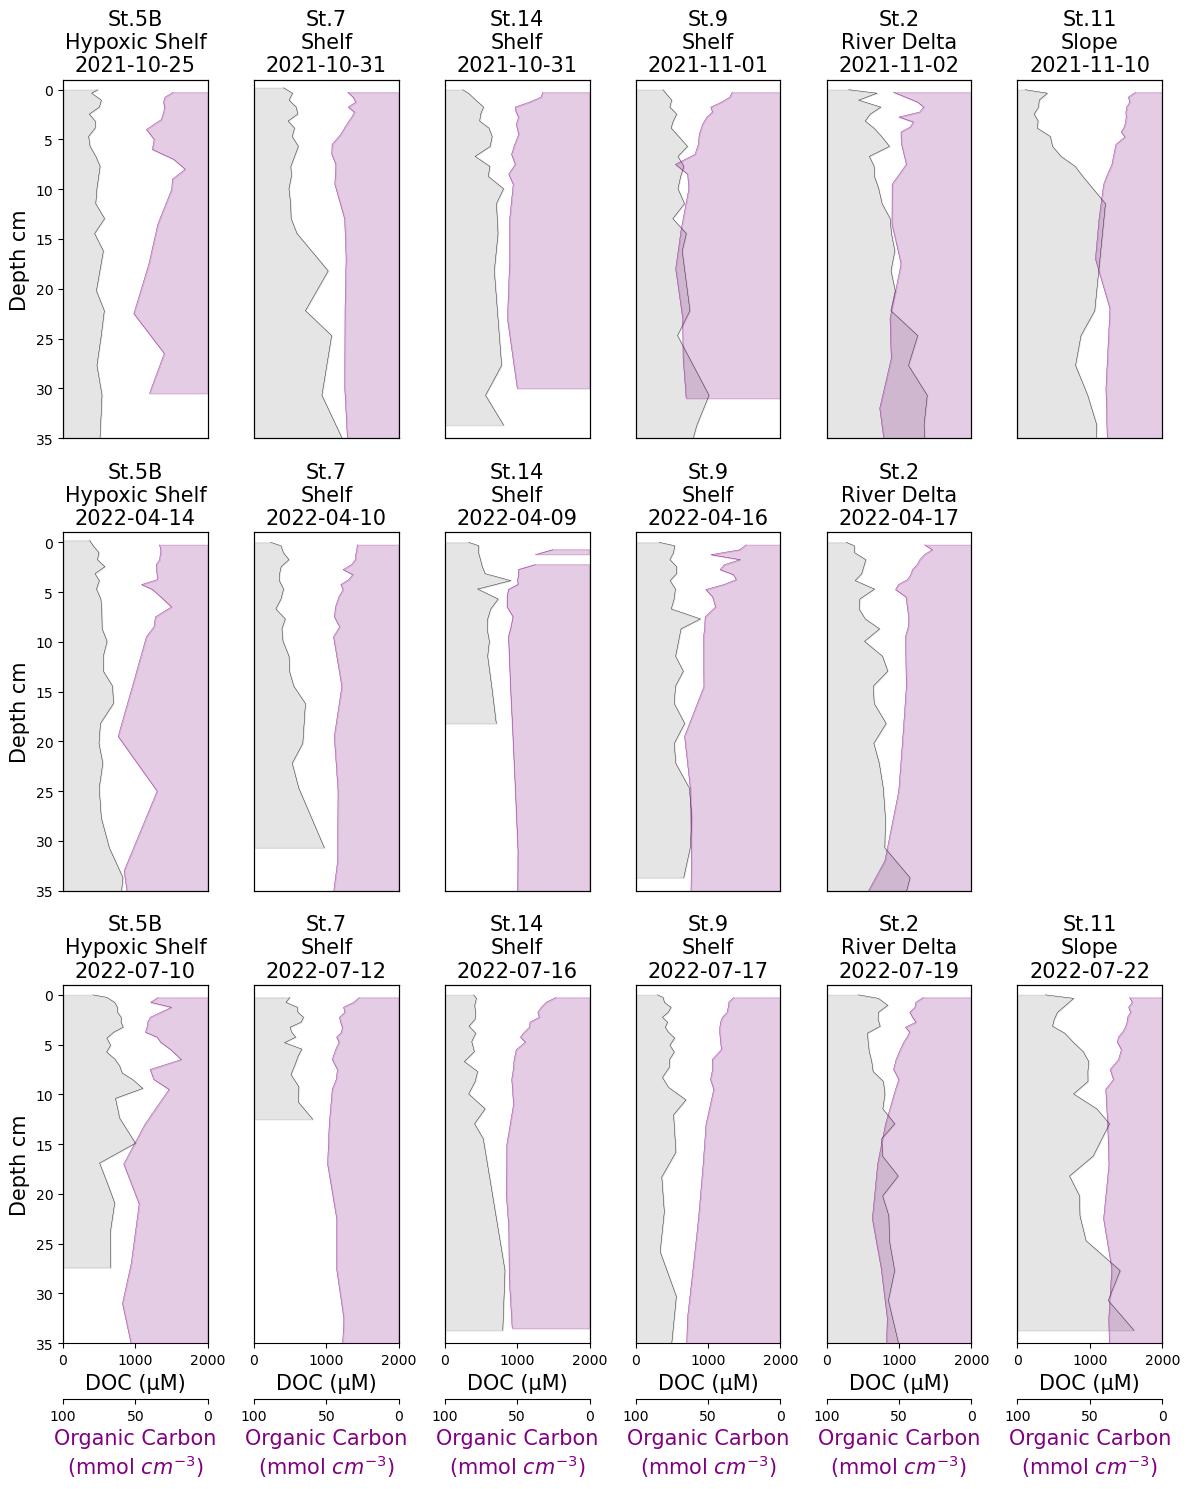

In [14]:
stations = [ 'St.5B','St.7','St.14','St.9', 'St.2', 'St.11']
trips = ['GOM21FA','GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        #get data 
        data_iron_pw = df_iron_pw[(df_iron_pw['Campaign'] == trip) & (df_iron_pw['Location'] == station)]
        data_doc_pw = df_doc_pw[(df_doc_pw['Campaign'] == trip) & (df_doc_pw['Location'] == station)]
        data_doc_pw = data_doc_pw[data_doc_pw['NPOC_uM'] <= 2000]
        data_ncs = df_ncs[(df_ncs['Trip'] == trip) & (df_ncs['Station'] == station)]
    
        #For Pore Waters 
        #get vars DOC 
        doc_uM_pw = data_doc_pw['NPOC_uM'] 
        doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
        tn_uM_pw = data_doc_pw['TN_uM'] 
        tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
        doc_depth_pw = data_doc_pw['Depth'] #X var 
        doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()

        #get vars Fe
        fe2_uM_pw = data_iron_pw['Fe2_uM'] 
        fe2_uM_pw = np.asarray(fe2_uM_pw, dtype=float).ravel()
        fe3_uM_pw = data_iron_pw['Fe3_uM'] 
        fe3_uM_pw = np.asarray(fe3_uM_pw, dtype=float).ravel()
        fe_depth_pw = data_iron_pw['Fe2_Depth'] 
        fe_depth_pw = np.asarray(fe_depth_pw, dtype=float).ravel()
    
        #get vars OM
        om = data_ncs['OC_mmolpcm3']
        om = np.asarray(om, dtype=float).ravel()
        depth_om = data_ncs['Depth_CM']
        depth_om = np.asarray(depth_om, dtype=float).ravel()
        
        if not data_ncs.empty:
            ax = axes[i, j]
            
            data_note = df_note[(df_note['camp'] == trip) & (df_note['station'] == station)]
            data_doc_flux = df_doc_flux[(df_doc_flux['Camp'] == trip) & (df_doc_flux['Stn'] == station)]
            date_txt = pd.to_datetime(data_note['Date']).iloc[0].strftime('%Y-%m-%d')
            station = data_note['station'].iloc[0]
            rgn = data_note['rgn'].iloc[0]
            
            ax.plot(doc_uM_pw, doc_depth_pw, c = 'black', lw = .25)
            ax.fill_betweenx(doc_depth_pw, doc_uM_pw, color='grey', alpha=0.2)
            ax.set_title(f'{station}\n{rgn}\n{date_txt}', size=15)
            ax.set_ylim(35, -1)
            ax.set_xlim(0, 2000)
            
            
            ax5 = ax.twiny()
            ax5.plot(om, depth_om, c = 'purple', lw = .25)
            ax5.fill_betweenx(depth_om, om, color='purple', alpha=0.2)
            ax5.set_ylim(35, -1)
            ax5.set_xlim(100, 0)
            
            
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth cm', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('DOC (\u03BCM)', size=15, c='black')
            ax.xaxis.set_tick_params(labelsize=10)
            
            
            ax5.set_xlabel(r'Organic Carbon'+'\n'+r'(mmol $cm^{-3})$', size = 15, c= 'purple')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 40))
            
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            
            ax5.set_xlabel('')
            ax5.xaxis.set_ticklabels([])
            ax5.set_xticks([])
            
plt.tight_layout()
fig.set_facecolor('w')
plt.savefig(f'../Dissertation_projects/Figures/Pore_water_profiles/profile_violin_OM_DOC.png')
plt.show()

In [ ]:
stop 

In [ ]:
for code in codes_list: 
    #get data 
    data_cdom_pw = df_cdom_pw[df_cdom_pw['code'] == code] 
    data_cdom_rz = df_cdom_rz[df_cdom_rz['code'] == code]
    data_spectra_pw = df_spectra_pw[df_spectra_pw['code'] == code] 
    data_spectra_rz = df_spectra_rz[df_spectra_rz['code'] == code]
    data_iron_pw = df_iron_pw[df_iron_pw['code'] == code] 
    data_iron_rz = df_iron_rz[(df_iron_rz['code'] == code) & (df_iron_rz['Type'] == 'RZ')]
    data_iron_gb = df_iron_rz[(df_iron_rz['code'] == code) & (df_iron_rz['Type'] == 'GBRZ')]
    data_doc_pw = df_doc_pw[df_doc_pw['code'] == code] 
    data_doc_rz = df_doc_rz[df_doc_rz['code'] == code]
    
    #For Pore Waters 
    #get vars DOC 
    doc_uM_pw = data_doc_pw['NPOC_uM'] 
    doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
    tn_uM_pw = data_doc_pw['TN_uM'] 
    tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
    doc_depth_pw = data_doc_pw['Depth'] #X var 
    doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()
    
    #get vars Fe
    fe2_uM_pw = data_iron_pw['Fe2_uM'] 
    fe2_uM_pw = np.asarray(fe2_uM_pw, dtype=float).ravel()
    fet_uM_pw = data_iron_pw['FeT_uM'] 
    fet_uM_pw = np.asarray(fet_uM_pw, dtype=float).ravel()
    fe3_uM_pw = data_iron_pw['Fe3_uM'] 
    fe3_uM_pw = np.asarray(fe3_uM_pw, dtype=float).ravel()
    fe_depth_pw = data_iron_pw['Fe2_Depth'] 
    fe_depth_pw = np.asarray(fe_depth_pw, dtype=float).ravel()
    
    #get vars CDOM
    a350_pw = data_spectra_pw['a350']
    a350_pw = np.asarray(a350_pw, dtype=float).ravel()
    aDepth_pw = data_spectra_pw['Sample_depth']
    aDepth_pw = np.asarray(aDepth_pw, dtype=float).ravel()
    
    # Set up the color bar limits
    vmin = -2
    vmax = 40
    scale_fac = 45
    sz = 15
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.5, 7))
    
    #PLOT DOC cent 
    if len(doc_uM_pw) > 0:
        ax.plot(doc_uM_pw, doc_depth_pw, 'o', ls='-', c='black')
        if np.nanmax(doc_uM_pw) > 1500: 
            ax.set_xlim(0,np.nanmax(doc_uM_pw)*1.05)
        else: 
            ax.set_xlim(0,1500)
        ax.set_ylim(vmax, vmin)
        ax.axhline(y=0, color='grey', linestyle='-', label='Sediment Water Interface')
        ax.set_title('')
        ax.xaxis.set_ticks_position('bottom')
        ax.xaxis.set_label_position('bottom')
        ax.spines['bottom'].set_position(('outward', 0))
        ax.set_xlabel('DOC (\u03BCM)', size= sz)
        ax.set_ylabel('Depth cm', size= sz)
    else: 
        ax.plot(100, 7, 'o', ls='-', c='white')
        ax.set_ylim(vmax, vmin)
        ax.set_xlim(0,1500)
        ax.axhline(y=0, color='grey', linestyle='-', label='Sediment Water Interface')
        ax.set_title('')
        ax.xaxis.set_ticks_position('bottom')
        ax.xaxis.set_label_position('bottom')
        ax.spines['bottom'].set_position(('outward', 0))
        ax.set_xlabel('DOC (\u03BCM)', size= sz)
        ax.set_ylabel('Depth cm', size= sz)
    
    #plot tdn
    if len(tn_uM_pw) > 0:
        ax04 = ax.twiny()
        ax04.plot(tn_uM_pw, doc_depth_pw, 'o', ls='-', c='g')
        if np.nanmax(tn_uM_pw) > 1000: 
            ax04.set_xlim(0,np.nanmax(tn_uM_pw)*1.05)
        else: 
            ax04.set_xlim(0,1000)
        ax04.set_xlim(0,np.nanmax(tn_uM_pw)*1.05)
        # Set x-axis label on bottom subplots
        ax04.xaxis.set_ticks_position('bottom')
        ax04.xaxis.set_label_position('bottom')
        ax04.spines['bottom'].set_position(('outward', scale_fac))
        ax04.set_xlabel('TDN (\u03BCM)', size= sz, c='g')
    else:
        pass
    
    #plot Fe2 cent
    if len(fe3_uM_pw) > 0:
        ax01 = ax.twiny()
        ax01.plot(fe2_uM_pw, fe_depth_pw, 'o', ls='-', c='b')
        if np.nanmax(fe3_uM_pw) > 500: 
            ax01.set_xlim(0,np.nanmax(fe3_uM_pw)*1.05)
        else: 
            ax01.set_xlim(0,500)
        # Set x-axis label on bottom subplots
        ax01.xaxis.set_ticks_position('bottom')
        ax01.xaxis.set_label_position('bottom')
        ax01.spines['bottom'].set_position(('outward', scale_fac*2))
        ax01.set_xlabel('dFe(II) (\u03BCM)', size= sz, c='b')
    else:
        pass
    
    #plot Fe3 
    if len(fe3_uM_pw) > 0:
        ax02 = ax.twiny()
        ax02.plot(fe3_uM_pw, fe_depth_pw, 'o', ls='-', c='r')
        if np.nanmax(fe3_uM_pw) > 500: 
            ax02.set_xlim(0,np.nanmax(fe3_uM_pw)*1.05)
        else: 
            ax02.set_xlim(0,500)    # Set x-axis label on bottom subplots
        ax02.xaxis.set_ticks_position('bottom')
        ax02.xaxis.set_label_position('bottom')
        ax02.spines['bottom'].set_position(('outward', scale_fac*3))
        ax02.set_xlabel('dFe(III) (\u03BCM)', size= sz, c='r')
    else:
        pass
    
    #plot cdom 
    if len(a350_pw) > 0:
        ax03 = ax.twiny()
        ax03.plot(a350_pw, aDepth_pw, 'o', ls='-', c='y')
        if np.nanmax(a350_pw) >= 300: 
            ax03.set_xlim(0,np.nanmax(a350_pw)*1.05)
        else: 
            ax03.set_xlim(0,300)
        # Set x-axis label on bottom subplots
        ax03.xaxis.set_ticks_position('bottom')
        ax03.xaxis.set_label_position('bottom')
        ax03.spines['bottom'].set_position(('outward', scale_fac*4))
        ax03.set_xlabel(r'$a_{\mathrm{CDOM}}$ 350 (nm) $(m^{-})$', size= 10, c='y')
    else:
        pass
    
    date_txt = pd.to_datetime(df_note.loc[code, 'Date']).strftime('%Y-%m-%d')
    station = df_note.loc[code, 'station']

    
    fig.suptitle(f'{station}'+ f'\n {date_txt}', size = sz)
    
    fig.set_facecolor('w')
    plt.tight_layout()
    plt.savefig(f'../Dissertation_projects/Figures/Pore_water_profiles/profile_{code}.png')
    plt.show()
    

In [ ]:
# Get unique codes from df_doc_pw and df_cdom_pw
unique_codes_om = np.sort(df_ncs['code'].unique())


# Concatenate unique codes
codes_list = np.unique(unique_codes_om)
print(len(codes_list))
print(codes_list)


In [ ]:
for code in codes_list: 
    #get data 
    data_cdom_pw = df_cdom_pw[df_cdom_pw['code'] == code] 
    data_spectra_pw = df_spectra_pw[df_spectra_pw['code'] == code] 
    data_iron_pw = df_iron_pw[df_iron_pw['code'] == code] 
    data_doc_pw = df_doc_pw[df_doc_pw['code'] == code] 
    
    data_ncs = df_ncs[df_ncs['code'] == code]
    
    #For Pore Waters 
    #get vars DOC 
    doc_uM_pw = data_doc_pw['NPOC_uM'] 
    doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
    tn_uM_pw = data_doc_pw['TN_uM'] 
    tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
    doc_depth_pw = data_doc_pw['Depth'] #X var 
    doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()

    #get vars Fe
    fe2_uM_pw = data_iron_pw['Fe2_uM'] 
    fe2_uM_pw = np.asarray(fe2_uM_pw, dtype=float).ravel()
    fet_uM_pw = data_iron_pw['FeT_uM'] 
    fet_uM_pw = np.asarray(fet_uM_pw, dtype=float).ravel()
    fe3_uM_pw = data_iron_pw['Fe3_uM'] 
    fe3_uM_pw = np.asarray(fe3_uM_pw, dtype=float).ravel()
    fe_depth_pw = data_iron_pw['Fe2_Depth'] 
    fe_depth_pw = np.asarray(fe_depth_pw, dtype=float).ravel()
    
    #get vars OM
    om = data_ncs['OC_gpcm3']
    om = np.asarray(om, dtype=float).ravel()
    depth_om = data_ncs['Depth_CM']
    depth_om = np.asarray(depth_om, dtype=float).ravel()
    
    # Set up the color bar limits
    vmin = -2
    vmax = 40
    scale_fac = 45
    sz = 15
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.5, 7))
    
    #PLOT DOC cent 
    if len(doc_uM_pw) > 0:
        ax.plot(doc_uM_pw, doc_depth_pw, 'o', ls='-', c='black')
        if np.nanmax(doc_uM_pw) > 1500: 
            ax.set_xlim(0,np.nanmax(doc_uM_pw)*1.05)
        else: 
            ax.set_xlim(0,1500)
        ax.set_ylim(vmax, vmin)
        ax.axhline(y=0, color='grey', linestyle='-', label='Sediment Water Interface')
        ax.set_title('')
        ax.xaxis.set_ticks_position('bottom')
        ax.xaxis.set_label_position('bottom')
        ax.spines['bottom'].set_position(('outward', 0))
        ax.set_xlabel('DOC (\u03BCM)', size= sz)
        ax.set_ylabel('Depth cm', size= sz)
    else: 
        ax.plot(100, 7, 'o', ls='-', c='white')
        ax.set_ylim(vmax, vmin)
        ax.set_xlim(0,1500)
        ax.axhline(y=0, color='grey', linestyle='-', label='Sediment Water Interface')
        ax.set_title('')
        ax.xaxis.set_ticks_position('bottom')
        ax.xaxis.set_label_position('bottom')
        ax.spines['bottom'].set_position(('outward', 0))
        ax.set_xlabel('DOC (\u03BCM)', size= sz)
        ax.set_ylabel('Depth cm', size= sz)
    
    #plot tdn
    if len(tn_uM_pw) > 0:
        ax04 = ax.twiny()
        ax04.plot(tn_uM_pw, doc_depth_pw, 'o', ls='-', c='g')
        if np.nanmax(tn_uM_pw) > 1000: 
            ax04.set_xlim(0,np.nanmax(tn_uM_pw)*1.05)
        else: 
            ax04.set_xlim(0,1000)
        ax04.set_xlim(0,np.nanmax(tn_uM_pw)*1.05)
        # Set x-axis label on bottom subplots
        ax04.xaxis.set_ticks_position('bottom')
        ax04.xaxis.set_label_position('bottom')
        ax04.spines['bottom'].set_position(('outward', scale_fac))
        ax04.set_xlabel('TDN (\u03BCM)', size= sz, c='g')
    else:
        pass
    
    #plot Fe2 cent
    if len(fe3_uM_pw) > 0:
        ax01 = ax.twiny()
        ax01.plot(fe2_uM_pw, fe_depth_pw, 'o', ls='-', c='b')
        if np.nanmax(fe3_uM_pw) > 500: 
            ax01.set_xlim(0,np.nanmax(fe3_uM_pw)*1.05)
        else: 
            ax01.set_xlim(0,500)
        # Set x-axis label on bottom subplots
        ax01.xaxis.set_ticks_position('bottom')
        ax01.xaxis.set_label_position('bottom')
        ax01.spines['bottom'].set_position(('outward', scale_fac*2))
        ax01.set_xlabel('dFe(II) (\u03BCM)', size= sz, c='b')
    else:
        pass
    
    #plot Fe3 
    if len(fe3_uM_pw) > 0:
        ax02 = ax.twiny()
        ax02.plot(fe3_uM_pw, fe_depth_pw, 'o', ls='-', c='r')
        if np.nanmax(fe3_uM_pw) > 500: 
            ax02.set_xlim(0,np.nanmax(fe3_uM_pw)*1.05)
        else: 
            ax02.set_xlim(0,500)    # Set x-axis label on bottom subplots
        ax02.xaxis.set_ticks_position('bottom')
        ax02.xaxis.set_label_position('bottom')
        ax02.spines['bottom'].set_position(('outward', scale_fac*3))
        ax02.set_xlabel('dFe(III) (\u03BCM)', size= sz, c='r')
    else:
        pass
    
    #plot OM 
    if len(om) > 0:
        ax03 = ax.twiny()
        ax03.plot(om, depth_om, 'o', ls='-', c='brown')
        if np.nanmax(om) >= 1: 
            ax03.set_xlim(0,np.nanmax(om)*1.05)
        else: 
            ax03.set_xlim(0,1)
        # Set x-axis label on bottom subplots
        ax03.xaxis.set_ticks_position('bottom')
        ax03.xaxis.set_label_position('bottom')
        ax03.spines['bottom'].set_position(('outward', scale_fac*4))
        ax03.set_xlabel(r'Organic Carbon g $(cm^{-3})$', size= 10, c='brown')
    else:
        pass
    
    date_txt = pd.to_datetime(df_note.loc[code, 'Date']).strftime('%Y-%m-%d')
    station = df_note.loc[code, 'station']

    
    fig.suptitle(f'{station}'+ f'\n {date_txt}', size = sz)
    
    fig.set_facecolor('w')
    plt.tight_layout()
    plt.savefig(f'../Dissertation_projects/Figures/Pore_water_profiles/profile_carbon_{code}.png')
    plt.show()
    

In [ ]:
for code in codes_list: 
    #get data 
    data_cdom_pw = df_cdom_pw[df_cdom_pw['code'] == code] 
    data_spectra_pw = df_spectra_pw[df_spectra_pw['code'] == code] 
    data_iron_pw = df_iron_pw[df_iron_pw['code'] == code] 
    data_doc_pw = df_doc_pw[df_doc_pw['code'] == code] 
    
    data_ncs = df_ncs[df_ncs['code'] == code]
    
    #For Pore Waters 
    #get vars DOC 
    doc_uM_pw = data_doc_pw['NPOC_uM'] 
    doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
    tn_uM_pw = data_doc_pw['TN_uM'] 
    tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
    doc_depth_pw = data_doc_pw['Depth'] #X var 
    doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()

    #get vars Fe
    fe2_uM_pw = data_iron_pw['Fe2_uM'] 
    fe2_uM_pw = np.asarray(fe2_uM_pw, dtype=float).ravel()
    fet_uM_pw = data_iron_pw['FeT_uM'] 
    fet_uM_pw = np.asarray(fet_uM_pw, dtype=float).ravel()
    fe3_uM_pw = data_iron_pw['Fe3_uM'] 
    fe3_uM_pw = np.asarray(fe3_uM_pw, dtype=float).ravel()
    fe_depth_pw = data_iron_pw['Fe2_Depth'] 
    fe_depth_pw = np.asarray(fe_depth_pw, dtype=float).ravel()
    
    #get vars OM
    om = data_ncs['OC_gpcm3']
    om = np.asarray(om, dtype=float).ravel()
    depth_om = data_ncs['Depth_CM']
    depth_om = np.asarray(depth_om, dtype=float).ravel()
    
    # Set up the color bar limits
    vmin = -2
    vmax = 40
    scale_fac = 45
    sz = 15
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.5, 7))
    
    #PLOT DOC cent 
    if len(doc_uM_pw) > 0:
        ax.plot(doc_uM_pw, doc_depth_pw, 'o', ls='-', c='black')
        ax.plot(-doc_uM_pw, doc_depth_pw, 'o', ls='-', c='black')
        ax.set_xlim(-1500,1500)
        ax.set_ylim(vmax, vmin)
        ax.axhline(y=0, color='grey', linestyle='-', label='Sediment Water Interface')
        ax.set_title('')
        ax.xaxis.set_ticks_position('bottom')
        ax.xaxis.set_label_position('bottom')
        ax.spines['bottom'].set_position(('outward', 0))
        ax.set_xlabel('DOC (\u03BCM)', size= sz)
        ax.set_ylabel('Depth cm', size= sz)
    else: 
        ax.plot(100, 7, 'o', ls='-', c='white')
        ax.set_ylim(vmax, vmin)
        ax.set_xlim(-1500,1500)
        ax.axhline(y=0, color='grey', linestyle='-', label='Sediment Water Interface')
        ax.set_title('')
        ax.xaxis.set_ticks_position('bottom')
        ax.xaxis.set_label_position('bottom')
        ax.spines['bottom'].set_position(('outward', 0))
        ax.set_xlabel('DOC (\u03BCM)', size= sz)
        ax.set_ylabel('Depth cm', size= sz)
    
    #plot Fe2 cent
    if len(fe3_uM_pw) > 0:
        ax01 = ax.twiny()
        ax01.plot(fe2_uM_pw, fe_depth_pw, 'o', ls='-', c='b')
        ax01.plot(-fe2_uM_pw, fe_depth_pw, 'o', ls='-', c='b')
        ax01.set_xlim(-500,500)
        # Set x-axis label on bottom subplots
        ax01.xaxis.set_ticks_position('bottom')
        ax01.xaxis.set_label_position('bottom')
        ax01.spines['bottom'].set_position(('outward', scale_fac*2))
        ax01.set_xlabel('dFe(II) (\u03BCM)', size= sz, c='b')
    else:
        pass
    
    #plot Fe3 
    if len(fe3_uM_pw) > 0:
        ax02 = ax.twiny()
        ax02.plot(fe3_uM_pw, fe_depth_pw, 'o', ls='-', c='r')
        ax02.plot(-fe3_uM_pw, fe_depth_pw, 'o', ls='-', c='r')
        ax02.set_xlim(-500,500)    # Set x-axis label on bottom subplots
        ax02.xaxis.set_ticks_position('bottom')
        ax02.xaxis.set_label_position('bottom')
        ax02.spines['bottom'].set_position(('outward', scale_fac*3))
        ax02.set_xlabel('dFe(III) (\u03BCM)', size= sz, c='r')
    else:
        pass
    
    #plot OM 
    if len(om) > 0:
        ax03 = ax.twiny()
        ax03.plot(om, depth_om, 'o', ls='-', c='brown')
        ax03.plot(-om, depth_om, 'o', ls='-', c='brown')
        ax03.set_xlim(-1,1)
        # Set x-axis label on bottom subplots
        ax03.xaxis.set_ticks_position('bottom')
        ax03.xaxis.set_label_position('bottom')
        ax03.spines['bottom'].set_position(('outward', scale_fac*4))
        ax03.set_xlabel(r'Organic Carbon g $(cm^{-3})$', size= 10, c='brown')
    else:
        pass
    
    date_txt = pd.to_datetime(df_note.loc[code, 'Date']).strftime('%Y-%m-%d')
    station = df_note.loc[code, 'station']
    
    fig.suptitle(f'{station}'+ f'\n {date_txt}', size = sz)
    
    fig.set_facecolor('w')
    plt.tight_layout()
    #plt.savefig(f'../Dissertation_projects/Figures/Pore_water_profiles/profile_carbon_{code}.png')
    plt.show()
    

In [ ]:
stations = [ 'St.5B','St.7','St.14','St.9', 'St.2', 'St.11']
trips = ['GOM21FA','GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        #get data 
        data_iron_pw = df_iron_pw[(df_iron_pw['Campaign'] == trip) & (df_iron_pw['Location'] == station)]
        data_doc_pw = df_doc_pw[(df_doc_pw['Campaign'] == trip) & (df_doc_pw['Location'] == station)]
        data_doc_pw = data_doc_pw[data_doc_pw['NPOC_uM'] <= 2000]
        data_ncs = df_ncs[(df_ncs['Trip'] == trip) & (df_ncs['Station'] == station)]
    
        #For Pore Waters 
        #get vars DOC 
        doc_uM_pw = data_doc_pw['NPOC_uM'] 
        doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
        tn_uM_pw = data_doc_pw['TN_uM'] 
        tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
        doc_depth_pw = data_doc_pw['Depth'] #X var 
        doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()

        #get vars Fe
        fe2_uM_pw = data_iron_pw['Fe2_uM'] 
        fe2_uM_pw = np.asarray(fe2_uM_pw, dtype=float).ravel()
        fe3_uM_pw = data_iron_pw['Fe3_uM'] 
        fe3_uM_pw = np.asarray(fe3_uM_pw, dtype=float).ravel()
        fe_depth_pw = data_iron_pw['Fe2_Depth'] 
        fe_depth_pw = np.asarray(fe_depth_pw, dtype=float).ravel()
    
        #get vars OM
        om = data_ncs['OC_gpcm3']
        om = np.asarray(om, dtype=float).ravel()
        depth_om = data_ncs['Depth_CM']
        depth_om = np.asarray(depth_om, dtype=float).ravel()
        
        if not data_ncs.empty:
            ax = axes[i, j]
            
            data_note = df_note[(df_note['camp'] == trip) & (df_note['station'] == station)]
            data_doc_flux = df_doc_flux[(df_doc_flux['Camp'] == trip) & (df_doc_flux['Stn'] == station)]
            date_txt = pd.to_datetime(data_note['Date']).iloc[0].strftime('%Y-%m-%d')
            station = data_note['station'].iloc[0]
            
            ax.plot(doc_uM_pw, doc_depth_pw, c='black')
            ax.set_title(f'{station}\n{date_txt}', size=15)
            ax.set_ylim(44, -1)
            ax.set_xlim(0, 2000)
            if not data_doc_flux.empty:
                flux = round(data_doc_flux['pw_flux_doc'].iloc[0], 3)
                ax.text(200,43, f'{flux}'+r' F$_{DOC}$'+'\n'+'(mmol $m^{-2}$ $day^{-1})$', size = 7)
            else: 
                ax.text(200,43, f'no flux reported', size = 5)
            ax.axhline(linewidth=.5, color='grey')
            
            ax2 = ax.twiny()
            ax2.plot(tn_uM_pw, doc_depth_pw, c = 'green')
            ax.set_ylim(44, -1)
            ax2.set_xlim(0, 2000)
            
            ax3 = ax.twiny()
            ax3.plot(fe2_uM_pw, fe_depth_pw, c = 'blue')
            ax.set_ylim(44, -1)
            ax3.set_xlim(0,200)
            
            ax4 = ax.twiny()
            ax4.plot(fe3_uM_pw, fe_depth_pw, c = 'red')
            ax.set_ylim(44, -1)
            ax4.set_xlim(0,400)
            
            ax5 = ax.twiny()
            ax5.plot(om, depth_om, c = 'brown')
            ax.set_ylim(44, -1)
            ax5.set_xlim(0,1)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth cm', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('DOC (\u03BCM)', size=15, c='black')
            ax.xaxis.set_tick_params(labelsize=10)
            
            ax2.set_xlabel('TDN (\u03BCM)', size = 15, c= 'green')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
            
            ax3.set_xlabel('dFe(II) (\u03BCM)', size = 15, c= 'blue')
            ax3.xaxis.set_ticks_position('bottom')
            ax3.xaxis.set_label_position('bottom')
            ax3.spines['bottom'].set_position(('outward', 80))
            
            ax4.set_xlabel('dFe(III) (\u03BCM)', size = 15, c= 'red')
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 120))
            
            ax5.set_xlabel(r'Organic Carbon'+'\n'+r'(g $cm^{-3})$', size = 15, c= 'brown')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 160))
            
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
            
            ax4.set_xlabel('')
            ax4.xaxis.set_ticklabels([])
            ax4.set_xticks([])
            
            ax5.set_xlabel('')
            ax5.xaxis.set_ticklabels([])
            ax5.set_xticks([])
            
plt.tight_layout()
fig.set_facecolor('w')
plt.savefig(f'../Dissertation_projects/Figures/Pore_water_profiles/profile_carbon.png')
plt.show()

In [ ]:
stations = [ 'St.5B','St.7','St.14','St.9', 'St.2', 'St.11']
trips = ['GOM21FA','GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        #get data 
        data_iron_pw = df_iron_pw[(df_iron_pw['Campaign'] == trip) & (df_iron_pw['Location'] == station)]
        data_doc_pw = df_doc_pw[(df_doc_pw['Campaign'] == trip) & (df_doc_pw['Location'] == station)]
        data_doc_pw = data_doc_pw[data_doc_pw['NPOC_uM'] <= 2000]
        data_ncs = df_ncs[(df_ncs['Trip'] == trip) & (df_ncs['Station'] == station)]
    
        #For Pore Waters 
        #get vars DOC 
        doc_uM_pw = data_doc_pw['NPOC_uM'] 
        doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
        tn_uM_pw = data_doc_pw['TN_uM'] 
        tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
        doc_depth_pw = data_doc_pw['Depth'] #X var 
        doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()

        #get vars Fe
        fe2_uM_pw = data_iron_pw['Fe2_uM'] 
        fe2_uM_pw = np.asarray(fe2_uM_pw, dtype=float).ravel()
        fe3_uM_pw = data_iron_pw['Fe3_uM'] 
        fe3_uM_pw = np.asarray(fe3_uM_pw, dtype=float).ravel()
        fe_depth_pw = data_iron_pw['Fe2_Depth'] 
        fe_depth_pw = np.asarray(fe_depth_pw, dtype=float).ravel()
    
        #get vars OM
        om = data_ncs['OC_gpcm3']
        om = np.asarray(om, dtype=float).ravel()
        depth_om = data_ncs['Depth_CM']
        depth_om = np.asarray(depth_om, dtype=float).ravel()
        
        if not data_ncs.empty:
            ax = axes[i, j]
            
            data_note = df_note[(df_note['camp'] == trip) & (df_note['station'] == station)]
            data_doc_flux = df_doc_flux[(df_doc_flux['Camp'] == trip) & (df_doc_flux['Stn'] == station)]
            date_txt = pd.to_datetime(data_note['Date']).iloc[0].strftime('%Y-%m-%d')
            station = data_note['station'].iloc[0]
            rgn = data_note['rgn'].iloc[0]
            
            ax.plot(doc_uM_pw, doc_depth_pw, c = 'black', lw = .25)
            ax.fill_betweenx(doc_depth_pw, doc_uM_pw, color='grey', alpha=0.2)
            ax.set_title(f'{station}\n{rgn}\n{date_txt}', size=15)
            ax.set_ylim(44, -1)
            ax.set_xlim(0, 2000)
            if not data_doc_flux.empty:
                flux = round(data_doc_flux['pw_flux_doc'].iloc[0], 3)
                ax.text(200,43, f'{flux}'+r' F$_{DOC}$'+'\n'+'(mmol $m^{-2}$ $day^{-1})$', size = 7)
            else: 
                ax.text(200,43, f'no flux reported', size = 5)
            ax.axhline(linewidth=.5, color='grey')
            
            #ax2 = ax.twiny()
            #ax2.plot(tn_uM_pw, doc_depth_pw, c = 'green')
            #ax.set_ylim(44, -1)
            #ax2.set_xlim(0, 2000)
            
            ax3 = ax.twiny()
            ax3.plot(fe2_uM_pw, fe_depth_pw, c = 'blue', lw = .25)
            ax3.fill_betweenx(fe_depth_pw, fe2_uM_pw, color='blue', alpha=0.3)
            ax3.set_ylim(44, -1)
            ax3.set_xlim(200, 0)
            
            ax4 = ax.twiny()
            ax4.plot(fe3_uM_pw, fe_depth_pw, c = 'red', lw = .25)
            ax4.fill_betweenx(fe_depth_pw, fe3_uM_pw, color='red', alpha=0.1)
            ax4.set_ylim(44, -1)
            ax4.set_xlim(400, 0)
            
            ax5 = ax.twiny()
            ax5.plot(om, depth_om, c = 'purple', lw = .25)
            ax5.fill_betweenx(depth_om, om, color='purple', alpha=0.1)
            ax5.set_ylim(44, -1)
            ax5.set_xlim(.2,2)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth cm', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('DOC (\u03BCM)', size=15, c='black')
            ax.xaxis.set_tick_params(labelsize=10)
            
            #ax2.set_xlabel('TDN (\u03BCM)', size = 15, c= 'green')
            #ax2.xaxis.set_ticks_position('bottom')
            #ax2.xaxis.set_label_position('bottom')
            #ax2.spines['bottom'].set_position(('outward', 40))
            
            ax3.set_xlabel('dFe(II) (\u03BCM)', size = 15, c= 'blue')
            ax3.xaxis.set_ticks_position('bottom')
            ax3.xaxis.set_label_position('bottom')
            ax3.spines['bottom'].set_position(('outward', 40))
            
            ax4.set_xlabel('dFe(III) (\u03BCM)', size = 15, c= 'red')
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 80))
            
            ax5.set_xlabel(r'Organic Carbon'+'\n'+r'(g $cm^{-3})$', size = 15, c= 'purple')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 120))
            
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
            
            ax4.set_xlabel('')
            ax4.xaxis.set_ticklabels([])
            ax4.set_xticks([])
            
            ax5.set_xlabel('')
            ax5.xaxis.set_ticklabels([])
            ax5.set_xticks([])
            
plt.tight_layout()
fig.set_facecolor('w')
plt.savefig(f'../Dissertation_projects/Figures/Pore_water_profiles/profile_violin.png')
plt.show()

In [ ]:
df_iron_pw_join = df_iron_pw['FeT_uM']
df_doc_pw = df_doc_pw.rename_axis("Sample_ID")
df_iron_pw_join = df_iron_pw_join.rename_axis("Sample_ID")
df_doc_pw.index = df_doc_pw.index.astype(str)
df_iron_pw_join.index = df_iron_pw_join.index.astype(str)


df_doc_pw_iron = df_doc_pw.join(df_iron_pw_join)
df_doc_pw_iron['OCtoFeratio'] = df_doc_pw_iron['NPOC_uM'] / df_doc_pw_iron['FeT_uM']

df_doc_pw_iron = df_doc_pw_iron[df_doc_pw_iron['OCtoFeratio'].notna()]

stations = ['St.2', 'St.16','St.5B', 'St.MK', 'St.4', 'St.7', 'St.9', 'St.14', 'St.11', 'St.12', 'St.13', 'St.15']
trips = ['GOM2021','GOM21FA','GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        #get data 
        data_doc_pw = df_doc_pw_iron[(df_doc_pw_iron['Campaign'] == trip) & (df_doc_pw_iron['Location'] == station)]
    
        #For Pore Waters 
        #get vars DOC 
        doc_uM_pw = data_doc_pw['OCtoFeratio'] 
        doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
        tn_uM_pw = data_doc_pw['TN_uM'] 
        tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
        doc_depth_pw = data_doc_pw['Depth'] #X var 
        doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()

        
        if not data_doc_pw.empty:
            ax = axes[i, j]
            
            data_note = df_note[(df_note['camp'] == trip) & (df_note['station'] == station)]
            data_doc_flux = df_doc_flux[(df_doc_flux['Camp'] == trip) & (df_doc_flux['Stn'] == station)]
            date_txt = pd.to_datetime(data_note['Date']).iloc[0].strftime('%Y-%m-%d')
            station = data_note['station'].iloc[0]
            rgn = data_note['rgn'].iloc[0]
            
            ax.plot(doc_uM_pw, doc_depth_pw, c = 'black', lw = .25)
            ax.fill_betweenx(doc_depth_pw, doc_uM_pw, color='grey', alpha=0.2)
            ax.set_title(f'{station}\n{rgn}\n{date_txt}', size=15)
            ax.set_ylim(44, -1)
            ax.set_xlim(0, 15)
            if not data_doc_flux.empty:
                flux = round(data_doc_flux['pw_flux_doc'].iloc[0], 3)
                ax.text(5,43, f'{flux}'+r' F$_{DOC}$'+'\n'+'(mmol $m^{-2}$ $day^{-1})$', size = 7)
            else: 
                ax.text(5,43, f'no flux reported', size = 5)
            ax.axhline(linewidth=.5, color='grey')
            
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth cm', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 3:
            ax.set_xlabel('DOC:Fe', size=15, c='black')
            ax.xaxis.set_tick_params(labelsize=10)
            
            
            
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
        
            
plt.tight_layout()
fig.set_facecolor('w')
#plt.savefig(f'../Dissertation_projects/Figures/Pore_water_profiles/profile_violin_all_doc.png')
plt.show()

In [ ]:
stations = [ 'St.5B','St.7','St.14','St.9', 'St.2', 'St.11']
trips = ['GOM21FA','GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        #get data 
        data_iron_pw = df_iron_pw[(df_iron_pw['Campaign'] == trip) & (df_iron_pw['Location'] == station)]
        data_doc_pw = df_doc_pw[(df_doc_pw['Campaign'] == trip) & (df_doc_pw['Location'] == station)]
        data_doc_pw = data_doc_pw[data_doc_pw['NPOC_uM'] <= 2000]
        data_ncs = df_ncs[(df_ncs['Trip'] == trip) & (df_ncs['Station'] == station)]
    
        #For Pore Waters 
        #get vars DOC 
        doc_uM_pw = data_doc_pw['NPOC_uM'] 
        doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
        tn_uM_pw = data_doc_pw['TN_uM'] 
        tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
        doc_depth_pw = data_doc_pw['Depth'] #X var 
        doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()

        #get vars Fe
        fe2_uM_pw = data_iron_pw['Fe2_uM'] 
        fe2_uM_pw = np.asarray(fe2_uM_pw, dtype=float).ravel()
        fe3_uM_pw = data_iron_pw['Fe3_uM'] 
        fe3_uM_pw = np.asarray(fe3_uM_pw, dtype=float).ravel()
        fe_depth_pw = data_iron_pw['Fe2_Depth'] 
        fe_depth_pw = np.asarray(fe_depth_pw, dtype=float).ravel()
    
        #get vars OM
        om = data_ncs['OC_mmolpcm3']
        om = np.asarray(om, dtype=float).ravel()
        ss = data_ncs['S_mmolpcm3']
        ss = np.asarray(ss, dtype=float).ravel()
        depth_om = data_ncs['Depth_CM']
        depth_om = np.asarray(depth_om, dtype=float).ravel()
        
        if not data_ncs.empty:
            ax = axes[i, j]
            
            data_note = df_note[(df_note['camp'] == trip) & (df_note['station'] == station)]
            data_doc_flux = df_doc_flux[(df_doc_flux['Camp'] == trip) & (df_doc_flux['Stn'] == station)]
            date_txt = pd.to_datetime(data_note['Date']).iloc[0].strftime('%Y-%m-%d')
            station = data_note['station'].iloc[0]
            rgn = data_note['rgn'].iloc[0]
            
            ax.plot(doc_uM_pw, doc_depth_pw, c = 'black', lw = .05)
            ax.fill_betweenx(doc_depth_pw, doc_uM_pw, color='grey', alpha=0.15)
            ax.set_title(f'{station}\n{rgn}\n{date_txt}', size=15)
            ax.set_ylim(40, -1)
            ax.set_xlim(0, 2000)
            #if not data_doc_flux.empty:
            #    flux = round(data_doc_flux['pw_flux_doc'].iloc[0], 3)
            #    ax.text(200,43, f'{flux}'+r' F$_{DOC}$'+'\n'+'(mmol $m^{-2}$ $day^{-1})$', size = 7)
            #else: 
            #    ax.text(200,43, f'no flux reported', size = 5)
            ax.axhline(linewidth=.5, color='grey')
            
            
            ax5 = ax.twiny()
            ax5.plot(om, depth_om, c = 'purple', lw = .05)
            ax5.fill_betweenx(depth_om, om, color='purple', alpha=0.15)
            ax5.set_ylim(40, -1)
            ax5.set_xlim(150, 0)
            
            ax4 = ax.twiny()
            ax4.plot(ss, depth_om, c = 'y', lw = .05)
            ax4.fill_betweenx(depth_om, ss, color='y', alpha=0.15)
            ax4.set_ylim(40, -1)
            ax4.set_xlim(-25, 25)
            
            ax3 = ax.twiny()
            ax3.plot(fe2_uM_pw, fe_depth_pw, c = 'blue', lw = .05)
            ax3.fill_betweenx(fe_depth_pw, fe2_uM_pw, color='blue', alpha=0.15)
            ax3.set_ylim(40, -1)
            ax3.set_xlim(200, -200)
            
            ax41 = ax.twiny()
            ax41.plot(ss, depth_om, c = 'y', lw = .05)
            ax41.fill_betweenx(depth_om, ss, color='y', alpha=0.15)
            ax41.set_ylim(40, -1)
            ax41.set_xlim(25, -25)
            
            ax31 = ax.twiny()
            ax31.plot(fe2_uM_pw, fe_depth_pw, c = 'blue', lw = .05)
            ax31.fill_betweenx(fe_depth_pw, fe2_uM_pw, color='blue', alpha=0.15)
            ax31.set_ylim(40, -1)
            ax31.set_xlim(-200, 200)
            
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth cm', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('DOC (\u03BCM)', size=15, c='black')
            ax.xaxis.set_tick_params(labelsize=10)
            
            ax31.set_xlabel('')
            ax31.xaxis.set_ticklabels([])
            ax31.set_xticks([])
            
            ax41.set_xlabel('')
            ax41.xaxis.set_ticklabels([])
            ax41.set_xticks([])
            
            ax3.set_xlabel('dFe(II) (\u03BCM)', size = 15, c= 'blue')
            ax3.xaxis.set_ticks_position('bottom')
            ax3.xaxis.set_label_position('bottom')
            ax3.spines['bottom'].set_position(('outward', 40))
            
            ax4.set_xlabel(r'Sulfer'+'\n'+r'(mmol $cm^{-3})$', size=15, c='y')
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 80))
            
            ax5.set_xlabel(r'Organic Carbon'+'\n'+r'(mmol $cm^{-3})$', size = 15, c= 'purple')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 140))
            
            
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
            
            ax4.set_xlabel('')
            ax4.xaxis.set_ticklabels([])
            ax4.set_xticks([])
            
            ax31.set_xlabel('')
            ax31.xaxis.set_ticklabels([])
            ax31.set_xticks([])
            
            ax41.set_xlabel('')
            ax41.xaxis.set_ticklabels([])
            ax41.set_xticks([])
            
            ax5.set_xlabel('')
            ax5.xaxis.set_ticklabels([])
            ax5.set_xticks([])
            
plt.tight_layout()
fig.set_facecolor('w')
plt.savefig(f'../Dissertation_projects/Figures/Pore_water_profiles/profile_violin_OM_DOC_S_Fe2.png')
plt.show()

In [ ]:
stations = [ 'St.5B','St.7','St.14','St.9', 'St.2', 'St.11']
trips = ['GOM21FA','GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        #get data 
        data_iron_pw = df_iron_pw[(df_iron_pw['Campaign'] == trip) & (df_iron_pw['Location'] == station)]
        data_doc_pw = df_doc_pw[(df_doc_pw['Campaign'] == trip) & (df_doc_pw['Location'] == station)]
        data_doc_pw = data_doc_pw[data_doc_pw['NPOC_uM'] <= 2000]
        data_ncs = df_ncs[(df_ncs['Trip'] == trip) & (df_ncs['Station'] == station)]
    
        #For Pore Waters 
        #get vars DOC 
        doc_uM_pw = data_doc_pw['NPOC_uM'] 
        doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
        tn_uM_pw = data_doc_pw['TN_uM'] 
        tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
        doc_depth_pw = data_doc_pw['Depth'] #X var 
        doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()

        #get vars Fe
        fe2_uM_pw = data_iron_pw['Fe2_uM'] 
        fe2_uM_pw = np.asarray(fe2_uM_pw, dtype=float).ravel()
        fe3_uM_pw = data_iron_pw['Fe3_uM'] 
        fe3_uM_pw = np.asarray(fe3_uM_pw, dtype=float).ravel()
        fe_depth_pw = data_iron_pw['Fe2_Depth'] 
        fe_depth_pw = np.asarray(fe_depth_pw, dtype=float).ravel()
    
        #get vars OM
        om = data_ncs['OC_gpcm3']
        om = np.asarray(om, dtype=float).ravel()
        depth_om = data_ncs['Depth_CM']
        depth_om = np.asarray(depth_om, dtype=float).ravel()
        
        if not data_ncs.empty:
            ax = axes[i, j]
            
            data_note = df_note[(df_note['camp'] == trip) & (df_note['station'] == station)]
            data_doc_flux = df_doc_flux[(df_doc_flux['Camp'] == trip) & (df_doc_flux['Stn'] == station)]
            date_txt = pd.to_datetime(data_note['Date']).iloc[0].strftime('%Y-%m-%d')
            station = data_note['station'].iloc[0]
            rgn = data_note['rgn'].iloc[0]
            
            ax.plot(doc_uM_pw, doc_depth_pw, c = 'black', lw = .25)
            ax.fill_betweenx(doc_depth_pw, doc_uM_pw, color='grey', alpha=0.2)
            ax.set_title(f'{station}\n{rgn}\n{date_txt}', size=15)
            ax.set_ylim(44, -1)
            ax.set_xlim(0, 2000)
            if not data_doc_flux.empty:
                flux = round(data_doc_flux['pw_flux_doc'].iloc[0], 3)
                ax.text(200,43, f'{flux}'+r' F$_{DOC}$'+'\n'+'(mmol $m^{-2}$ $day^{-1})$', size = 7)
            else: 
                ax.text(200,43, f'no flux reported', size = 5)
            ax.axhline(linewidth=.5, color='grey')
            
            #ax2 = ax.twiny()
            #ax2.plot(tn_uM_pw, doc_depth_pw, c = 'green')
            #ax.set_ylim(44, -1)
            #ax2.set_xlim(0, 2000)
            
            ax3 = ax.twiny()
            ax3.plot(fe2_uM_pw, fe_depth_pw, c = 'blue', lw = .25)
            ax3.fill_betweenx(fe_depth_pw, fe2_uM_pw, color='blue', alpha=0.3)
            ax3.set_ylim(44, -1)
            ax3.set_xlim(200, 0)
            
            ax4 = ax.twiny()
            ax4.plot(fe3_uM_pw, fe_depth_pw, c = 'red', lw = .25)
            ax4.fill_betweenx(fe_depth_pw, fe3_uM_pw, color='red', alpha=0.1)
            ax4.set_ylim(44, -1)
            ax4.set_xlim(400, 0)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth cm', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('DOC (\u03BCM)', size=15, c='black')
            ax.xaxis.set_tick_params(labelsize=10)
            
            #ax2.set_xlabel('TDN (\u03BCM)', size = 15, c= 'green')
            #ax2.xaxis.set_ticks_position('bottom')
            #ax2.xaxis.set_label_position('bottom')
            #ax2.spines['bottom'].set_position(('outward', 40))
            
            ax3.set_xlabel('dFe(II) (\u03BCM)', size = 15, c= 'blue')
            ax3.xaxis.set_ticks_position('bottom')
            ax3.xaxis.set_label_position('bottom')
            ax3.spines['bottom'].set_position(('outward', 40))
            
            ax4.set_xlabel('dFe(III) (\u03BCM)', size = 15, c= 'red')
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 80))
            
            
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
            
            ax4.set_xlabel('')
            ax4.xaxis.set_ticklabels([])
            ax4.set_xticks([])
            
plt.tight_layout()
fig.set_facecolor('w')
plt.savefig(f'../Dissertation_projects/Figures/Pore_water_profiles/profile_violin_doc.png')
plt.show()

In [ ]:
stations = [ 'St.5B','St.7','St.14','St.9', 'St.2', 'St.11']
trips = ['GOM21FA','GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        #get data 
        data_iron_pw = df_iron_pw[(df_iron_pw['Campaign'] == trip) & (df_iron_pw['Location'] == station)]
        data_doc_pw = df_doc_pw[(df_doc_pw['Campaign'] == trip) & (df_doc_pw['Location'] == station)]
        data_doc_pw = data_doc_pw[data_doc_pw['NPOC_uM'] <= 2000]
        data_ncs = df_ncs[(df_ncs['Trip'] == trip) & (df_ncs['Station'] == station)]
    
        #For Pore Waters 
        #get vars DOC 
        doc_uM_pw = data_doc_pw['NPOC_uM'] 
        doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
        tn_uM_pw = data_doc_pw['TN_uM'] 
        tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
        doc_depth_pw = data_doc_pw['Depth'] #X var 
        doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()

        #get vars Fe
        fe2_uM_pw = data_iron_pw['Fe2_uM'] 
        fe2_uM_pw = np.asarray(fe2_uM_pw, dtype=float).ravel()
        fe3_uM_pw = data_iron_pw['Fe3_uM'] 
        fe3_uM_pw = np.asarray(fe3_uM_pw, dtype=float).ravel()
        fe_depth_pw = data_iron_pw['Fe2_Depth'] 
        fe_depth_pw = np.asarray(fe_depth_pw, dtype=float).ravel()
    
        #get vars OM
        om = data_ncs['OC_mmolpcm3']
        om = np.asarray(om, dtype=float).ravel()
        depth_om = data_ncs['Depth_CM']
        depth_om = np.asarray(depth_om, dtype=float).ravel()
        
        if not data_ncs.empty:
            ax = axes[i, j]
            
            data_note = df_note[(df_note['camp'] == trip) & (df_note['station'] == station)]
            data_doc_flux = df_doc_flux[(df_doc_flux['Camp'] == trip) & (df_doc_flux['Stn'] == station)]
            date_txt = pd.to_datetime(data_note['Date']).iloc[0].strftime('%Y-%m-%d')
            station = data_note['station'].iloc[0]
            rgn = data_note['rgn'].iloc[0]
            
            ax.plot(om, depth_om, c = 'black', lw = .25)
            ax.fill_betweenx(depth_om, om, color='purple', alpha=0.2)
            ax.set_title(f'{station}\n{rgn}\n{date_txt}', size=15)
            ax.set_ylim(44, -1)
            ax.set_xlim(0, 100)
            
            
            ax3 = ax.twiny()
            ax3.plot(fe2_uM_pw, fe_depth_pw, c = 'blue', lw = .25)
            ax3.fill_betweenx(fe_depth_pw, fe2_uM_pw, color='blue', alpha=0.3)
            ax3.set_ylim(44, -1)
            ax3.set_xlim(200, 0)
            
            ax4 = ax.twiny()
            ax4.plot(fe3_uM_pw, fe_depth_pw, c = 'red', lw = .25)
            ax4.fill_betweenx(fe_depth_pw, fe3_uM_pw, color='red', alpha=0.1)
            ax4.set_ylim(44, -1)
            ax4.set_xlim(400, 0)
            
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth cm', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel(r'Organic Carbon'+'\n'+r'(mmol $cm^{-3})$', size=15, c='purple')
            ax.xaxis.set_tick_params(labelsize=10)
            
            #ax2.set_xlabel('TDN (\u03BCM)', size = 15, c= 'green')
            #ax2.xaxis.set_ticks_position('bottom')
            #ax2.xaxis.set_label_position('bottom')
            #ax2.spines['bottom'].set_position(('outward', 40))
            
            ax3.set_xlabel('dFe(II) (\u03BCM)', size = 15, c= 'blue')
            ax3.xaxis.set_ticks_position('bottom')
            ax3.xaxis.set_label_position('bottom')
            ax3.spines['bottom'].set_position(('outward', 60))
            
            ax4.set_xlabel('dFe(III) (\u03BCM)', size = 15, c= 'red')
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 100))
            
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
            
            ax4.set_xlabel('')
            ax4.xaxis.set_ticklabels([])
            ax4.set_xticks([])
            
            
plt.tight_layout()
fig.set_facecolor('w')
plt.savefig(f'../Dissertation_projects/Figures/Pore_water_profiles/profile_violin_OM.png')
plt.show()

In [ ]:
stations = [ 'St.5B','St.7','St.14','St.9', 'St.2', 'St.11']
trips = ['GOM21FA','GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        #get data 
        data_iron_pw = df_iron_pw[(df_iron_pw['Campaign'] == trip) & (df_iron_pw['Location'] == station)]
        data_doc_pw = df_doc_pw[(df_doc_pw['Campaign'] == trip) & (df_doc_pw['Location'] == station)]
        data_doc_pw = data_doc_pw[data_doc_pw['NPOC_uM'] <= 2000]
        data_ncs = df_ncs[(df_ncs['Trip'] == trip) & (df_ncs['Station'] == station)]
    
        #For Pore Waters 
        #get vars DOC 
        doc_uM_pw = data_doc_pw['NPOC_uM'] 
        doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
        tn_uM_pw = data_doc_pw['TN_uM'] 
        tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
        doc_depth_pw = data_doc_pw['Depth'] #X var 
        doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()

        #get vars Fe
        fe2_uM_pw = data_iron_pw['Fe2_uM'] 
        fe2_uM_pw = np.asarray(fe2_uM_pw, dtype=float).ravel()
        fe3_uM_pw = data_iron_pw['Fe3_uM'] 
        fe3_uM_pw = np.asarray(fe3_uM_pw, dtype=float).ravel()
        fe_depth_pw = data_iron_pw['Fe2_Depth'] 
        fe_depth_pw = np.asarray(fe_depth_pw, dtype=float).ravel()
    
        #get vars OM
        om = data_ncs['OC_mmolpcm3']
        om = np.asarray(om, dtype=float).ravel()
        sn = data_ncs['N_mmolpcm3']
        sn = np.asarray(sn, dtype=float).ravel()
        ss = data_ncs['S_mmolpcm3']
        ss = np.asarray(ss, dtype=float).ravel()
        depth_om = data_ncs['Depth_CM']
        depth_om = np.asarray(depth_om, dtype=float).ravel()
        
        if not data_ncs.empty:
            ax = axes[i, j]
            
            data_note = df_note[(df_note['camp'] == trip) & (df_note['station'] == station)]
            data_doc_flux = df_doc_flux[(df_doc_flux['Camp'] == trip) & (df_doc_flux['Stn'] == station)]
            date_txt = pd.to_datetime(data_note['Date']).iloc[0].strftime('%Y-%m-%d')
            station = data_note['station'].iloc[0]
            rgn = data_note['rgn'].iloc[0]
            
            ax.plot(om, depth_om, c = 'black', lw = .25)
            ax.fill_betweenx(depth_om, om, color='purple', alpha=0.2)
            ax.set_title(f'{station}\n{rgn}\n{date_txt}', size=15)
            ax.set_ylim(44, -1)
            ax.set_xlim(0, 100)
            
            #ax3 = ax.twiny()
            #ax3.plot(sn, depth_om, c = 'green', lw = .25)
            #ax3.fill_betweenx(depth_om, sn, color='green', alpha=0.2)
            #ax3.set_ylim(44, -1)
            #ax3.set_xlim(0, 50)
            
            ax4 = ax.twiny()
            ax4.plot(ss, depth_om, c = 'y', lw = .25)
            ax4.fill_betweenx(depth_om, ss, color='y', alpha=0.6)
            ax4.set_ylim(44, -1)
            ax4.set_xlim(0, 25)
            
            ax3 = ax.twiny()
            ax3.plot(sn, depth_om, c = 'green', lw = .25)
            ax3.fill_betweenx(depth_om, sn, color='green', alpha=0.2)
            ax3.set_ylim(44, -1)
            ax3.set_xlim(0, 50)
            
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth cm', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel(r'Organic Carbon'+'\n'+r'(mmol $cm^{-3})$', size=15, c='purple')
            ax.xaxis.set_tick_params(labelsize=10)
            
            #ax2.set_xlabel('TDN (\u03BCM)', size = 15, c= 'green')
            #ax2.xaxis.set_ticks_position('bottom')
            #ax2.xaxis.set_label_position('bottom')
            #ax2.spines['bottom'].set_position(('outward', 40))
            
            #ax3.set_xlabel(r'Nitogen'+'\n'+r'(mmol $cm^{-3})$', size=15, c='green')
            #ax3.xaxis.set_ticks_position('bottom')
            #ax3.xaxis.set_label_position('bottom')
            #ax3.spines['bottom'].set_position(('outward', 60))
            
            ax4.set_xlabel(r'Sulfer'+'\n'+r'(mmol $cm^{-3})$', size=15, c='y')
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 60))
            
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
            
            ax4.set_xlabel('')
            ax4.xaxis.set_ticklabels([])
            ax4.set_xticks([])
            
            
plt.tight_layout()
fig.set_facecolor('w')
plt.savefig(f'../Dissertation_projects/Figures/Pore_water_profiles/profile_violin_NCS.png')
plt.show()

In [ ]:
stations = ['St.2', 'St.16','St.5B', 'St.MK', 'St.4', 'St.7', 'St.9', 'St.14', 'St.11', 'St.12', 'St.13', 'St.15']
trips = ['GOM2021','GOM21FA','GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        #get data 
        data_iron_pw = df_iron_pw[(df_iron_pw['Campaign'] == trip) & (df_iron_pw['Location'] == station)]
        data_doc_pw = df_doc_pw[(df_doc_pw['Campaign'] == trip) & (df_doc_pw['Location'] == station)]
        data_doc_pw = data_doc_pw[data_doc_pw['NPOC_uM'] <= 2000]
        data_ncs = df_ncs[(df_ncs['Trip'] == trip) & (df_ncs['Station'] == station)]
    
        #For Pore Waters 
        #get vars DOC 
        doc_uM_pw = data_doc_pw['NPOC_uM'] 
        doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
        tn_uM_pw = data_doc_pw['TN_uM'] 
        tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
        doc_depth_pw = data_doc_pw['Depth'] #X var 
        doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()

        #get vars Fe
        fe2_uM_pw = data_iron_pw['Fe2_uM'] 
        fe2_uM_pw = np.asarray(fe2_uM_pw, dtype=float).ravel()
        fe3_uM_pw = data_iron_pw['Fe3_uM'] 
        fe3_uM_pw = np.asarray(fe3_uM_pw, dtype=float).ravel()
        fe_depth_pw = data_iron_pw['Fe2_Depth'] 
        fe_depth_pw = np.asarray(fe_depth_pw, dtype=float).ravel()
    
        #get vars OM
        om = data_ncs['OC_gpcm3']
        om = np.asarray(om, dtype=float).ravel()
        depth_om = data_ncs['Depth_CM']
        depth_om = np.asarray(depth_om, dtype=float).ravel()
        
        if not data_doc_pw.empty:
            ax = axes[i, j]
            
            data_note = df_note[(df_note['camp'] == trip) & (df_note['station'] == station)]
            data_doc_flux = df_doc_flux[(df_doc_flux['Camp'] == trip) & (df_doc_flux['Stn'] == station)]
            date_txt = pd.to_datetime(data_note['Date']).iloc[0].strftime('%Y-%m-%d')
            station = data_note['station'].iloc[0]
            rgn = data_note['rgn'].iloc[0]
            
            ax.plot(doc_uM_pw, doc_depth_pw, c = 'black', lw = .25)
            ax.fill_betweenx(doc_depth_pw, doc_uM_pw, color='grey', alpha=0.2)
            ax.set_title(f'{station}\n{rgn}\n{date_txt}', size=15)
            ax.set_ylim(44, -1)
            ax.set_xlim(0, 2000)
            if not data_doc_flux.empty:
                flux = round(data_doc_flux['pw_flux_doc'].iloc[0], 3)
                ax.text(200,43, f'{flux}'+r' F$_{DOC}$'+'\n'+'(mmol $m^{-2}$ $day^{-1})$', size = 7)
            else: 
                ax.text(200,43, f'no flux reported', size = 5)
            ax.axhline(linewidth=.5, color='grey')
            
            #ax2 = ax.twiny()
            #ax2.plot(tn_uM_pw, doc_depth_pw, c = 'green')
            #ax.set_ylim(44, -1)
            #ax2.set_xlim(0, 2000)
            
            ax3 = ax.twiny()
            ax3.plot(fe2_uM_pw, fe_depth_pw, c = 'blue', lw = .25)
            ax3.fill_betweenx(fe_depth_pw, fe2_uM_pw, color='blue', alpha=0.3)
            ax3.set_ylim(44, -1)
            ax3.set_xlim(200, 0)
            
            ax4 = ax.twiny()
            ax4.plot(fe3_uM_pw, fe_depth_pw, c = 'red', lw = .25)
            ax4.fill_betweenx(fe_depth_pw, fe3_uM_pw, color='red', alpha=0.1)
            ax4.set_ylim(44, -1)
            ax4.set_xlim(400, 0)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth cm', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 3:
            ax.set_xlabel('DOC (\u03BCM)', size=15, c='black')
            ax.xaxis.set_tick_params(labelsize=10)
            
            #ax2.set_xlabel('TDN (\u03BCM)', size = 15, c= 'green')
            #ax2.xaxis.set_ticks_position('bottom')
            #ax2.xaxis.set_label_position('bottom')
            #ax2.spines['bottom'].set_position(('outward', 40))
            
            ax3.set_xlabel('dFe(II) (\u03BCM)', size = 15, c= 'blue')
            ax3.xaxis.set_ticks_position('bottom')
            ax3.xaxis.set_label_position('bottom')
            ax3.spines['bottom'].set_position(('outward', 40))
            
            ax4.set_xlabel('dFe(III) (\u03BCM)', size = 15, c= 'red')
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 80))
            
            
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
            
            ax4.set_xlabel('')
            ax4.xaxis.set_ticklabels([])
            ax4.set_xticks([])
            
plt.tight_layout()
fig.set_facecolor('w')
plt.savefig(f'../Dissertation_projects/Figures/Pore_water_profiles/profile_violin_all_doc_fe.png')
plt.show()

In [ ]:
stations = ['St.2', 'St.16','St.5B', 'St.MK', 'St.4', 'St.7', 'St.9', 'St.14', 'St.11', 'St.12', 'St.13', 'St.15']
trips = ['GOM2021','GOM21FA','GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        #get data 
        data_iron_pw = df_iron_pw[(df_iron_pw['Campaign'] == trip) & (df_iron_pw['Location'] == station)]
        data_doc_pw = df_doc_pw[(df_doc_pw['Campaign'] == trip) & (df_doc_pw['Location'] == station)]
        data_doc_pw = data_doc_pw[data_doc_pw['NPOC_uM'] <= 2000]
        data_ncs = df_ncs[(df_ncs['Trip'] == trip) & (df_ncs['Station'] == station)]
    
        #For Pore Waters 
        #get vars DOC 
        doc_uM_pw = data_doc_pw['NPOC_uM'] 
        doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
        tn_uM_pw = data_doc_pw['TN_uM'] 
        tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
        doc_depth_pw = data_doc_pw['Depth'] #X var 
        doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()

        #get vars Fe
        fe2_uM_pw = data_iron_pw['Fe2_uM'] 
        fe2_uM_pw = np.asarray(fe2_uM_pw, dtype=float).ravel()
        fe3_uM_pw = data_iron_pw['Fe3_uM'] 
        fe3_uM_pw = np.asarray(fe3_uM_pw, dtype=float).ravel()
        fe_depth_pw = data_iron_pw['Fe2_Depth'] 
        fe_depth_pw = np.asarray(fe_depth_pw, dtype=float).ravel()
    
        #get vars OM
        om = data_ncs['OC_gpcm3']
        om = np.asarray(om, dtype=float).ravel()
        depth_om = data_ncs['Depth_CM']
        depth_om = np.asarray(depth_om, dtype=float).ravel()
        
        if not data_doc_pw.empty:
            ax = axes[i, j]
            
            data_note = df_note[(df_note['camp'] == trip) & (df_note['station'] == station)]
            data_doc_flux = df_doc_flux[(df_doc_flux['Camp'] == trip) & (df_doc_flux['Stn'] == station)]
            date_txt = pd.to_datetime(data_note['Date']).iloc[0].strftime('%Y-%m-%d')
            station = data_note['station'].iloc[0]
            rgn = data_note['rgn'].iloc[0]
            
            ax.plot(doc_uM_pw, doc_depth_pw, c = 'black', lw = .25)
            ax.fill_betweenx(doc_depth_pw, doc_uM_pw, color='grey', alpha=0.2)
            ax.set_title(f'{station}\n{rgn}\n{date_txt}', size=15)
            ax.set_ylim(44, -1)
            ax.set_xlim(0, 2000)
            if not data_doc_flux.empty:
                flux = round(data_doc_flux['pw_flux_doc'].iloc[0], 3)
                ax.text(200,43, f'{flux}'+r' F$_{DOC}$'+'\n'+'(mmol $m^{-2}$ $day^{-1})$', size = 7)
            else: 
                ax.text(200,43, f'no flux reported', size = 5)
            ax.axhline(linewidth=.5, color='grey')
            
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth cm', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 3:
            ax.set_xlabel('DOC (\u03BCM)', size=15, c='black')
            ax.xaxis.set_tick_params(labelsize=10)
            
            
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            
            
plt.tight_layout()
fig.set_facecolor('w')
plt.savefig(f'../Dissertation_projects/Figures/Pore_water_profiles/profile_violin_all_doc.png')
plt.show()

In [ ]:
interpolated_data = []

for code in codes_list:
    data_ncs = df_ncs[df_ncs['code'] == code]
    om = data_ncs['OC_mmolpcm3']
    om = np.asarray(om, dtype=float).ravel()
    ss = data_ncs['S_mmolpcm3']
    ss = np.asarray(ss, dtype=float).ravel()
    depth_om = data_ncs['Depth_CM']
    depth_om = np.asarray(depth_om, dtype=float).ravel()
    
    # Filter out non-finite values from om and corresponding depth_om
    valid_indices = np.isfinite(om)
    om = om[valid_indices]
    ss = ss[valid_indices]
    depth_om = depth_om[valid_indices]
    
    data_doc_pw = df_doc_pw[df_doc_pw['code'] == code]
    doc_uM_pw = data_doc_pw['NPOC_uM'] 
    doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
    tn_uM_pw = data_doc_pw['TN_uM'] 
    tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
    doc_depth_pw = data_doc_pw['Depth'] 
    doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()
    
    # Perform cubic spline interpolation
    cs = CubicSpline(depth_om, om)
    om_interpolated = cs(doc_depth_pw)
    cs = CubicSpline(depth_om, ss)
    ss_interpolated = cs(doc_depth_pw)
    
    om_interpolated_no_na = om_interpolated[~np.isnan(om_interpolated)]
    ss_interpolated_no_na = ss_interpolated[~np.isnan(ss_interpolated)]
    doc_uM_pw_no_na = doc_uM_pw[~np.isnan(doc_uM_pw)]

    
    # Create DataFrame for interpolated data
    interpolated_data.append(pd.DataFrame({
        'OM_interpolated': om_interpolated,
        'SS_interpolated': ss_interpolated,
        'OM_interpolated_mean': mean(om_interpolated_no_na),
        'SS_interpolated_mean': mean(ss_interpolated_no_na),
        'SS_interpolated_sd': np.std(ss_interpolated_no_na),
        'Depth': doc_depth_pw,
        'doc_uM_pw': doc_uM_pw,
        'doc_uM_pw_mean': mean(doc_uM_pw_no_na),
        'code': code,
        'stn': data_doc_pw['Location'], 
        'camp': data_doc_pw['Campaign']
    }))

# Concatenate all interpolated data frames into a single data frame
interpolated_df = pd.concat(interpolated_data, ignore_index=True)
interpolated_df['doc_uM_pw_norm'] = interpolated_df['doc_uM_pw'] / interpolated_df['OM_interpolated']
interpolated_df['doc_uM_pw_mean_agusted'] = interpolated_df['doc_uM_pw'] - interpolated_df['doc_uM_pw_mean']
interpolated_df['OM_interpolated_mean_agusted'] = interpolated_df['OM_interpolated'] - interpolated_df['OM_interpolated_mean']
interpolated_df['doc_uM_pw_norm_mean_agusted'] = interpolated_df['doc_uM_pw_mean_agusted'] / interpolated_df['OM_interpolated_mean_agusted']

interpolated_df['SS_interpolated_mean_agusted'] = interpolated_df['SS_interpolated'] - interpolated_df['SS_interpolated_mean']
interpolated_df['SS_interpolated_1Std_agusted'] = interpolated_df['SS_interpolated'] - interpolated_df['SS_interpolated_mean'] + interpolated_df['SS_interpolated_sd']


interpolated_df = interpolated_df[interpolated_df['doc_uM_pw_norm'] <= 100] 
interpolated_df = interpolated_df[interpolated_df['doc_uM_pw_norm'] >= 0] 
interpolated_df = interpolated_df[interpolated_df['SS_interpolated'] <= 20] 


interpolated_df

In [ ]:
feCal_data = []

for code in codes_list:
    data_iron_pw = df_iron_pw[df_iron_pw['code'] == code]
    
    if len (data_iron_pw) > 1:
        fe2 = data_iron_pw['Fe2_uM']
        fe2 = np.asarray(fe2, dtype=float).ravel()
        depth = data_iron_pw['Fe2_Depth']
        depth = np.asarray(depth, dtype=float).ravel()
        
        fe2_no_na = fe2[~np.isnan(fe2)]
    
        # Create DataFrame for interpolated data
        feCal_data.append(pd.DataFrame({
            'Depth': depth,
            'Fe2_uM_mean': mean(fe2_no_na),
            'code': code
        }))
    else: 
        print(code)
    
# Concatenate all interpolated data frames into a single data frame
feCal_data = pd.concat(feCal_data, ignore_index=True)
feCal_data

In [ ]:
# Merge the DataFrames on 'code' and 'Depth'
df_iron_pw['Depth'] = df_iron_pw['Fe2_Depth']
merged_df = pd.merge(interpolated_df, df_iron_pw, on=['code', 'Depth'], how='inner')


merged_df = pd.merge(merged_df, feCal_data, on=['code', 'Depth'], how='inner')
merged_df['Fe2_uM_mean_agusted'] = merged_df['Fe2_uM'] - merged_df['Fe2_uM_mean']



merged_df = merged_df[merged_df['SS_interpolated'] >= 0]
merged_df['Fe2toFe3_ratio'] = merged_df['Fe2_uM'] / merged_df['Fe3_uM']
merged_df['Fe2toOM_ratio'] = merged_df['Fe2_uM'] / merged_df['OM_interpolated']
merged_df['SStoOM_ratio'] = merged_df['SS_interpolated'] / merged_df['OM_interpolated']
merged_df['SStoFe2_ratio'] = merged_df['SS_interpolated'] / merged_df['Fe2_uM']
merged_df['Fe2toSS_ratio'] = merged_df['Fe2_uM'] / merged_df['SS_interpolated']

merged_df['SS_interpolated_norm_mean_agusted'] = merged_df['SStoOM_ratio'] / merged_df['OM_interpolated_mean_agusted']

#merged_df = merged_df[merged_df['Fe2toFe3_ratio'] <= 20] 



#merged_df = merged_df[merged_df['Fe2toFe3_ratio'] <= 20]
merged_df = merged_df[merged_df['Fe2toSS_ratio'].notna()]
merged_df = merged_df[np.isfinite(merged_df['Fe2toSS_ratio'])]
merged_df = merged_df[merged_df['SStoFe2_ratio'].notna()]
merged_df = merged_df[np.isfinite(merged_df['SStoFe2_ratio'])]
merged_df.columns

In [ ]:
stations = [ 'St.5B','St.7','St.14','St.9', 'St.2', 'St.11']
trips = ['GOM21FA','GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        #get data 
        data_in = interpolated_df[(interpolated_df['camp'] == trip) & (interpolated_df['stn'] == station)]
    
        #get data 
        data_iron_pw = df_iron_pw[(df_iron_pw['Campaign'] == trip) & (df_iron_pw['Location'] == station)]
        data_doc_pw = df_doc_pw[(df_doc_pw['Campaign'] == trip) & (df_doc_pw['Location'] == station)]
        data_doc_pw = data_doc_pw[data_doc_pw['NPOC_uM'] <= 2000]
        data_ncs = df_ncs[(df_ncs['Trip'] == trip) & (df_ncs['Station'] == station)]
    
        #For Pore Waters 
        #get vars DOC 
        doc_uM_pw = data_doc_pw['NPOC_uM'] 
        doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
        tn_uM_pw = data_doc_pw['TN_uM'] 
        tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
        doc_depth_pw = data_doc_pw['Depth'] #X var 
        doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()

        #get vars Fe
        fe2_uM_pw = data_iron_pw['Fe2_uM'] 
        fe2_uM_pw = np.asarray(fe2_uM_pw, dtype=float).ravel()
        fe3_uM_pw = data_iron_pw['Fe3_uM'] 
        fe3_uM_pw = np.asarray(fe3_uM_pw, dtype=float).ravel()
        fe_depth_pw = data_iron_pw['Fe2_Depth'] 
        fe_depth_pw = np.asarray(fe_depth_pw, dtype=float).ravel()
    
        #get vars OM
        om = data_ncs['OC_gpcm3']
        om = np.asarray(om, dtype=float).ravel()
        depth_om = data_ncs['Depth_CM']
        depth_om = np.asarray(depth_om, dtype=float).ravel()
        
        #get vars OM
        om_int = data_in['OM_interpolated']
        om_int = np.asarray(om_int, dtype=float).ravel()
        ss_int = data_in['SS_interpolated']
        ss_int = np.asarray(ss_int, dtype=float).ravel()
        doc_norm = data_in['doc_uM_pw_norm']
        doc_norm = np.asarray(doc_norm, dtype=float).ravel()
        depth_om_int = data_in['Depth']
        depth_om_int = np.asarray(depth_om_int, dtype=float).ravel()
        
        if not data_ncs.empty:
            ax = axes[i, j]
            
            data_note = df_note[(df_note['camp'] == trip) & (df_note['station'] == station)]
            data_doc_flux = df_doc_flux[(df_doc_flux['Camp'] == trip) & (df_doc_flux['Stn'] == station)]
            date_txt = pd.to_datetime(data_note['Date']).iloc[0].strftime('%Y-%m-%d')
            station = data_note['station'].iloc[0]
            rgn = data_note['rgn'].iloc[0]
            
            ax.plot(doc_norm, depth_om_int, c = 'black', lw = .25)
            ax.fill_betweenx(depth_om_int, doc_norm, color='grey', alpha=0.2)
            ax.set_title(f'{station}\n{rgn}\n{date_txt}', size=15)
            ax.set_ylim(30, -1)
            ax.set_xlim(0, max(depth_om_int)*1.5)
            
            ax3 = ax.twiny()
            ax3.plot(fe2_uM_pw, fe_depth_pw, c = 'blue', lw = .25)
            ax3.fill_betweenx(fe_depth_pw, fe2_uM_pw, color='blue', alpha=0.3)
            ax3.set_ylim(30, -1)
            ax3.set_xlim(max(pd.Series(fe2_uM_pw).dropna()) * 1.5, 0)
            
            #ax4 = ax.twiny()
            #ax4.plot(fe3_uM_pw, fe_depth_pw, c = 'red', lw = .25)
            #ax4.fill_betweenx(fe_depth_pw, fe3_uM_pw, color='red', alpha=0.1)
            #ax4.set_ylim(25, -1)
            #ax4.set_xlim(400, 0)
            
            #ax5 = ax.twiny()
            #ax5.plot(om, depth_om, c = 'purple', lw = .25)
            #ax5.fill_betweenx(depth_om, om, color='purple', alpha=0.1)
            #ax5.set_ylim(25, -1)
            #ax5.set_xlim(.2,2)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth cm', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        
        ax.set_xlabel('DOC normalized', size=15, c='black')
        ax.xaxis.set_tick_params(labelsize=10)
            
        ax3.set_xlabel('dFe(II) (\u03BCM)', size = 15, c= 'blue')
        ax3.xaxis.set_ticks_position('bottom')
        ax3.xaxis.set_label_position('bottom')
        ax3.spines['bottom'].set_position(('outward', 40))
            
            #ax4.set_xlabel('dFe(III) (\u03BCM)', size = 15, c= 'red')
            #ax4.xaxis.set_ticks_position('bottom')
            #ax4.xaxis.set_label_position('bottom')
            #ax4.spines['bottom'].set_position(('outward', 80))
            
            #ax5.set_xlabel(r'Organic Carbon'+'\n'+r'(g $cm^{-3})$', size = 15, c= 'purple')
            #ax5.xaxis.set_ticks_position('bottom')
            #ax5.xaxis.set_label_position('bottom')
            #ax5.spines['bottom'].set_position(('outward', 120))
            
        #else: 
            #ax.set_xlabel('')
            #ax.xaxis.set_ticklabels([])
            #ax.set_xticks([])

            
            #ax3.set_xlabel('')
            #ax3.xaxis.set_ticklabels([])
            #ax3.set_xticks([])
            
            #ax4.set_xlabel('')
            #ax4.xaxis.set_ticklabels([])
            #ax4.set_xticks([])
            
            #ax5.set_xlabel('')
            #ax5.xaxis.set_ticklabels([])
            #ax5.set_xticks([])
            
            
plt.tight_layout()
fig.set_facecolor('w')
plt.savefig(f'../Dissertation_projects/Figures/Pore_water_profiles/profile_violin_norm_doc.png')
plt.show()

In [ ]:
stations = [ 'St.5B','St.7','St.14','St.9', 'St.2', 'St.11']
trips = ['GOM21FA','GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        #get data 
        data_in = interpolated_df[(interpolated_df['camp'] == trip) & (interpolated_df['stn'] == station)]
    
        #get data 
        data_iron_pw = df_iron_pw[(df_iron_pw['Campaign'] == trip) & (df_iron_pw['Location'] == station)]
        data_doc_pw = df_doc_pw[(df_doc_pw['Campaign'] == trip) & (df_doc_pw['Location'] == station)]
        data_doc_pw = data_doc_pw[data_doc_pw['NPOC_uM'] <= 2000]
        data_ncs = df_ncs[(df_ncs['Trip'] == trip) & (df_ncs['Station'] == station)]
    
        #For Pore Waters 
        #get vars DOC 
        doc_uM_pw = data_doc_pw['NPOC_uM'] 
        doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
        tn_uM_pw = data_doc_pw['TN_uM'] 
        tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
        doc_depth_pw = data_doc_pw['Depth'] #X var 
        doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()

        #get vars Fe
        fe2_uM_pw = data_iron_pw['Fe2_uM'] 
        fe2_uM_pw = np.asarray(fe2_uM_pw, dtype=float).ravel()
        fe3_uM_pw = data_iron_pw['Fe3_uM'] 
        fe3_uM_pw = np.asarray(fe3_uM_pw, dtype=float).ravel()
        fe_depth_pw = data_iron_pw['Fe2_Depth'] 
        fe_depth_pw = np.asarray(fe_depth_pw, dtype=float).ravel()
    
        #get vars OM
        om = data_ncs['OC_gpcm3']
        om = np.asarray(om, dtype=float).ravel()
        ss = data_ncs['S_gpcm3']
        ss = np.asarray(ss, dtype=float).ravel()
        depth_om = data_ncs['Depth_CM']
        depth_om = np.asarray(depth_om, dtype=float).ravel()
        
        #get vars OM
        om_int = data_in['OM_interpolated']
        om_int = np.asarray(om_int, dtype=float).ravel()
        ss_int = data_in['SS_interpolated']
        ss_int = np.asarray(ss_int, dtype=float).ravel()
        doc_in =  data_in['doc_uM_pw']
        doc_in = np.asarray(doc_in, dtype=float).ravel()
        depth_om_int = data_in['Depth']
        depth_om_int = np.asarray(depth_om_int, dtype=float).ravel()
        
        if not data_ncs.empty:
            ax = axes[i, j]
            
            data_note = df_note[(df_note['camp'] == trip) & (df_note['station'] == station)]
            data_doc_flux = df_doc_flux[(df_doc_flux['Camp'] == trip) & (df_doc_flux['Stn'] == station)]
            date_txt = pd.to_datetime(data_note['Date']).iloc[0].strftime('%Y-%m-%d')
            station = data_note['station'].iloc[0]
            rgn = data_note['rgn'].iloc[0]
            
            ax.plot(doc_in, depth_om_int, c = 'black', lw = .25)
            ax.fill_betweenx(depth_om_int, doc_in, color='grey', alpha=0.2)
            ax.set_title(f'{station}\n{rgn}\n{date_txt}', size=15)
            ax.set_ylim(35, -1)
            ax.set_xlim(0, max(doc_in)*1.5)
            
            ax3 = ax.twiny()
            ax3.plot(fe2_uM_pw, fe_depth_pw, c = 'blue', lw = .25)
            ax3.fill_betweenx(fe_depth_pw, fe2_uM_pw, color='blue', alpha=0.1)
            ax3.set_ylim(35, -1)
            ax3.set_xlim(max(pd.Series(fe2_uM_pw).dropna()) * 1.5, 0)
            
            #ax4 = ax.twiny()
            #ax4.plot(fe3_uM_pw, fe_depth_pw, c = 'red', lw = .25)
            #ax4.fill_betweenx(fe_depth_pw, fe3_uM_pw, color='red', alpha=0.1)
            #ax4.set_ylim(25, -1)
            #ax4.set_xlim(400, 0)
            
            ax5 = ax.twiny()
            ax5.plot(ss, depth_om, c = 'y', lw = .25)
            ax5.fill_betweenx(depth_om, ss, color='y', alpha=0.2)
            ax5.set_ylim(35, -1)
            ax5.set_xlim(max(pd.Series(ss).dropna()) * 1.5, 0)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth cm', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        
        ax.set_xlabel('DOC  (\u03BCM)', size=15, c='black')
        ax.xaxis.set_tick_params(labelsize=10)
            
        ax3.set_xlabel('dFe(II) (\u03BCM)', size = 15, c= 'blue')
        ax3.xaxis.set_ticks_position('bottom')
        ax3.xaxis.set_label_position('bottom')
        ax3.spines['bottom'].set_position(('outward', 40))
            
            #ax4.set_xlabel('dFe(III) (\u03BCM)', size = 15, c= 'red')
            #ax4.xaxis.set_ticks_position('bottom')
            #ax4.xaxis.set_label_position('bottom')
            #ax4.spines['bottom'].set_position(('outward', 80))
            
        ax5.set_xlabel(r'Sulfer (g $cm^{-3})$', size = 15, c= 'y')
        ax5.xaxis.set_ticks_position('bottom')
        ax5.xaxis.set_label_position('bottom')
        ax5.spines['bottom'].set_position(('outward', 80))
            
        #else: 
            #ax.set_xlabel('')
            #ax.xaxis.set_ticklabels([])
            #ax.set_xticks([])

            
            #ax3.set_xlabel('')
            #ax3.xaxis.set_ticklabels([])
            #ax3.set_xticks([])
            
            #ax4.set_xlabel('')
            #ax4.xaxis.set_ticklabels([])
            #ax4.set_xticks([])
            
            #ax5.set_xlabel('')
            #ax5.xaxis.set_ticklabels([])
            #ax5.set_xticks([])
            
            
plt.tight_layout()
fig.set_facecolor('w')
plt.savefig(f'../Dissertation_projects/Figures/Pore_water_profiles/profile_violin_int_doc_sulfer.png')
plt.show()

In [ ]:
stations = [ 'St.5B','St.7','St.14','St.9', 'St.2', 'St.11']
trips = ['GOM21FA','GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        #get data 
        data_in = interpolated_df[(interpolated_df['camp'] == trip) & (interpolated_df['stn'] == station)]
    
        #get data 
        data_iron_pw = df_iron_pw[(df_iron_pw['Campaign'] == trip) & (df_iron_pw['Location'] == station)]
        data_doc_pw = df_doc_pw[(df_doc_pw['Campaign'] == trip) & (df_doc_pw['Location'] == station)]
        data_doc_pw = data_doc_pw[data_doc_pw['NPOC_uM'] <= 2000]
        data_ncs = df_ncs[(df_ncs['Trip'] == trip) & (df_ncs['Station'] == station)]
    
        #For Pore Waters 
        #get vars DOC 
        doc_uM_pw = data_doc_pw['NPOC_uM'] 
        doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
        tn_uM_pw = data_doc_pw['TN_uM'] 
        tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
        doc_depth_pw = data_doc_pw['Depth'] #X var 
        doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()

        #get vars Fe
        fe2_uM_pw = data_iron_pw['Fe2_uM'] 
        fe2_uM_pw = np.asarray(fe2_uM_pw, dtype=float).ravel()
        fe3_uM_pw = data_iron_pw['Fe3_uM'] 
        fe3_uM_pw = np.asarray(fe3_uM_pw, dtype=float).ravel()
        fe_depth_pw = data_iron_pw['Fe2_Depth'] 
        fe_depth_pw = np.asarray(fe_depth_pw, dtype=float).ravel()
    
        #get vars OM
        om = data_ncs['OC_gpcm3']
        om = np.asarray(om, dtype=float).ravel()
        ss = data_ncs['S_gpcm3']
        ss = np.asarray(ss, dtype=float).ravel()
        depth_om = data_ncs['Depth_CM']
        depth_om = np.asarray(depth_om, dtype=float).ravel()
        
        #get vars OM
        om_int = data_in['OM_interpolated']
        om_int = np.asarray(om_int, dtype=float).ravel()
        ss_int = data_in['SS_interpolated']
        ss_int = np.asarray(ss_int, dtype=float).ravel()
        doc_norm = data_in['doc_uM_pw_norm']
        doc_norm = np.asarray(doc_norm, dtype=float).ravel()
        depth_om_int = data_in['Depth']
        depth_om_int = np.asarray(depth_om_int, dtype=float).ravel()
        
        if not data_ncs.empty:
            ax = axes[i, j]
            
            data_note = df_note[(df_note['camp'] == trip) & (df_note['station'] == station)]
            data_doc_flux = df_doc_flux[(df_doc_flux['Camp'] == trip) & (df_doc_flux['Stn'] == station)]
            date_txt = pd.to_datetime(data_note['Date']).iloc[0].strftime('%Y-%m-%d')
            station = data_note['station'].iloc[0]
            rgn = data_note['rgn'].iloc[0]
            
            ax.plot(doc_norm, depth_om_int, c = 'black', lw = .25)
            ax.fill_betweenx(depth_om_int, doc_norm, color='grey', alpha=0.2)
            ax.set_title(f'{station}\n{rgn}\n{date_txt}', size=15)
            ax.set_ylim(35, -1)
            ax.set_xlim(0, max(depth_om_int)*1.5)
            
            ax3 = ax.twiny()
            ax3.plot(fe2_uM_pw, fe_depth_pw, c = 'blue', lw = .25)
            ax3.fill_betweenx(fe_depth_pw, fe2_uM_pw, color='blue', alpha=0.1)
            ax3.set_ylim(35, -1)
            ax3.set_xlim(max(pd.Series(fe2_uM_pw).dropna()) * 1.5, 0)
            
            #ax4 = ax.twiny()
            #ax4.plot(fe3_uM_pw, fe_depth_pw, c = 'red', lw = .25)
            #ax4.fill_betweenx(fe_depth_pw, fe3_uM_pw, color='red', alpha=0.1)
            #ax4.set_ylim(25, -1)
            #ax4.set_xlim(400, 0)
            
            ax5 = ax.twiny()
            ax5.plot(ss, depth_om, c = 'y', lw = .25)
            ax5.fill_betweenx(depth_om, ss, color='y', alpha=0.2)
            ax5.set_ylim(35, -1)
            ax5.set_xlim(max(pd.Series(ss).dropna()) * 1.5, 0)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth cm', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        
        ax.set_xlabel('DOC normalized', size=15, c='black')
        ax.xaxis.set_tick_params(labelsize=10)
            
        ax3.set_xlabel('dFe(II) (\u03BCM)', size = 15, c= 'blue')
        ax3.xaxis.set_ticks_position('bottom')
        ax3.xaxis.set_label_position('bottom')
        ax3.spines['bottom'].set_position(('outward', 40))
            
            #ax4.set_xlabel('dFe(III) (\u03BCM)', size = 15, c= 'red')
            #ax4.xaxis.set_ticks_position('bottom')
            #ax4.xaxis.set_label_position('bottom')
            #ax4.spines['bottom'].set_position(('outward', 80))
            
        ax5.set_xlabel(r'Sulfer (g $cm^{-3})$', size = 15, c= 'y')
        ax5.xaxis.set_ticks_position('bottom')
        ax5.xaxis.set_label_position('bottom')
        ax5.spines['bottom'].set_position(('outward', 80))
            
        #else: 
            #ax.set_xlabel('')
            #ax.xaxis.set_ticklabels([])
            #ax.set_xticks([])

            
            #ax3.set_xlabel('')
            #ax3.xaxis.set_ticklabels([])
            #ax3.set_xticks([])
            
            #ax4.set_xlabel('')
            #ax4.xaxis.set_ticklabels([])
            #ax4.set_xticks([])
            
            #ax5.set_xlabel('')
            #ax5.xaxis.set_ticklabels([])
            #ax5.set_xticks([])
            
            
plt.tight_layout()
fig.set_facecolor('w')
plt.savefig(f'../Dissertation_projects/Figures/Pore_water_profiles/profile_violin_norm_doc_sulfer.png')
plt.show()

In [ ]:
merged_df.columns

In [ ]:
merged_df_test = merged_df[merged_df['Fe2_uM_mean_agusted'] <= 0]
merged_df_test = merged_df_test[merged_df_test['SS_interpolated_1Std_agusted'] <= 0]
merged_df_test = merged_df_test[merged_df_test['doc_uM_pw_mean_agusted'] >= 0]

#print(merged_df_test['doc_uM_pw_mean_agusted'].mean())
merged_df_test

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))


x_var = 'Fe2_uM_mean_agusted'
y_var = 'SS_interpolated_mean_agusted'
z_var = 'doc_uM_pw_mean_agusted'


# Loop through the subplots
data_frame = merged_df
#data = data_frame[data_frame['stn'] != 'St.11']
#data = data[data['Depth'] > 2]
#data = data_frame[data_frame['Fe2toSS_ratio'] <= 250]
data = data_frame
data = data[[x_var, y_var, z_var]]
data.dropna(inplace=True)
X = data[[x_var]]
y = data[y_var]
colors = data[z_var].astype(float)

# Set up the color bar limits
vmin = data[z_var].max()*-1 #merged_df['doc_uM_pw_norm_mean_agusted'].max()*-.005
vmax = data[z_var].max() #merged_df['doc_uM_pw_norm_mean_agusted'].max()*.005

ax = axes
sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap='RdYlGn', vmin=vmin, vmax=vmax, legend=False)

#ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
ax.set_ylim([data[y_var].min(), data[y_var].max()])
ax.set_xlim([data[x_var].min(), data[x_var].max()])

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)    
cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.set_ylabel('DOC ', size = 15)
        
    # Adjust the layout of the subplots
fig.suptitle('title', size = 15)
fig.set_facecolor('w')
    #plt.tight_layout()
    
    

plt.show()

In [ ]:
stations = [ 'St.5B','St.7','St.14','St.9', 'St.2', 'St.11']
trips = ['GOM21FA','GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*7))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        #get data 
        data_in = interpolated_df[(interpolated_df['camp'] == trip) & (interpolated_df['stn'] == station)]
            
        #get data 
        data_iron_pw = df_iron_pw[(df_iron_pw['Campaign'] == trip) & (df_iron_pw['Location'] == station)]
        data_doc_pw = df_doc_pw[(df_doc_pw['Campaign'] == trip) & (df_doc_pw['Location'] == station)]
        data_doc_pw = data_doc_pw[data_doc_pw['NPOC_uM'] <= 2000]
        data_ncs = df_ncs[(df_ncs['Trip'] == trip) & (df_ncs['Station'] == station)]
    
        #For Pore Waters 
        #get vars DOC 
        doc_uM_pw = data_doc_pw['NPOC_uM'] 
        doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
        tn_uM_pw = data_doc_pw['TN_uM'] 
        tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
        doc_depth_pw = data_doc_pw['Depth'] #X var 
        doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()

        #get vars Fe
        fe2_uM_pw = data_iron_pw['Fe2_uM'] 
        fe2_uM_pw = np.asarray(fe2_uM_pw, dtype=float).ravel()
        fe3_uM_pw = data_iron_pw['Fe3_uM'] 
        fe3_uM_pw = np.asarray(fe3_uM_pw, dtype=float).ravel()
        fe_depth_pw = data_iron_pw['Fe2_Depth'] 
        fe_depth_pw = np.asarray(fe_depth_pw, dtype=float).ravel()
    
        #get vars OM
        om = data_ncs['OC_gpcm3']
        om = np.asarray(om, dtype=float).ravel()
        depth_om = data_ncs['Depth_CM']
        depth_om = np.asarray(depth_om, dtype=float).ravel()
        
        #get vars OM
        om_int = data_in['OM_interpolated']
        om_int = np.asarray(om_int, dtype=float).ravel()
        ss_int = data_in['SS_interpolated']
        ss_int = np.asarray(ss_int, dtype=float).ravel()
        doc_norm = data_in['doc_uM_pw_norm']
        doc_norm = np.asarray(doc_norm, dtype=float).ravel()
        depth_om_int = data_in['Depth']
        depth_om_int = np.asarray(depth_om_int, dtype=float).ravel()
        
        
        #merged 
        data_merge = merged_df[(merged_df['camp'] == trip) & (merged_df['stn'] == station)]
        #data_merge = data_merge[data_merge['SS_interpolated'] >= 0]
        #data_merge['SStoFe2_ratio'] = data_merge['SS_interpolated'] / data_merge['Fe2_uM']
        #data_merge['Fe2to_SSratio'] = data_merge['Fe2_uM'] / data_merge['SS_interpolated']
        
        #data_merge = data_merge[data_merge['Fe2to_SSratio'].notna()]
        #data_merge = data_merge[np.isfinite(data_merge['Fe2to_SSratio'])]
        
        #data_merge = data_merge[data_merge['Fe2to_SSratio'].notna()]
        #data_merge = data_merge[np.isfinite(data_merge['Fe2to_SSratio'])]
        
        ss_rat_fe2 = data_merge['SStoFe2_ratio']
        ss_rat_fe2 = np.asarray(ss_rat_fe2, dtype=float).ravel()
        fe2_rat_ss = data_merge['SStoFe2_ratio']
        fe2_rat_ss = np.asarray(fe2_rat_ss, dtype=float).ravel()
        depth_m = data_merge['Depth']
        depth_m = np.asarray(depth_m, dtype=float).ravel()

        Fe2_uM_mean_agusted = data_merge['Fe2_uM_mean_agusted']
        Fe2_uM_mean_agusted = np.asarray(Fe2_uM_mean_agusted, dtype=float).ravel()
        SS_interpolated_mean_agusted = data_merge['SS_interpolated_mean_agusted']
        SS_interpolated_mean_agusted = np.asarray(SS_interpolated_mean_agusted, dtype=float).ravel()
        doc_uM_pw_mean_agusted = data_merge['doc_uM_pw_mean_agusted']
        doc_uM_pw_mean_agusted = np.asarray(doc_uM_pw_mean_agusted, dtype=float).ravel()
        
        if not data_ncs.empty:
            ax = axes[i, j]
            
            data_note = df_note[(df_note['camp'] == trip) & (df_note['station'] == station)]
            data_doc_flux = df_doc_flux[(df_doc_flux['Camp'] == trip) & (df_doc_flux['Stn'] == station)]
            date_txt = pd.to_datetime(data_note['Date']).iloc[0].strftime('%Y-%m-%d')
            station = data_note['station'].iloc[0]
            rgn = data_note['rgn'].iloc[0]
            
            ax.plot(doc_uM_pw_mean_agusted, depth_m, c = 'black', lw = .2)
            ax.fill_betweenx(depth_m, doc_uM_pw_mean_agusted, color='grey', alpha=0.15)
            ax.set_title(f'{station}\n{rgn}\n{date_txt}', size=15)
            ax.set_ylim(30, -1)
            ax.set_xlim(max(doc_uM_pw_mean_agusted)*-1.5, max(doc_uM_pw_mean_agusted)*1.5)
            
            ax3 = ax.twiny()
            ax3.plot(SS_interpolated_mean_agusted, depth_m, c = 'y', lw = .2)
            ax3.fill_betweenx(depth_m, SS_interpolated_mean_agusted, color='y', alpha=0.1)
            ax3.set_ylim(30, -1)
            ax3.set_xlim(max(SS_interpolated_mean_agusted)*-1.5, max(SS_interpolated_mean_agusted)*1.5)
            
            ax4 = ax.twiny()
            ax4.plot(Fe2_uM_mean_agusted, depth_m, c = 'b', lw = .2)
            ax4.fill_betweenx(depth_m, Fe2_uM_mean_agusted, color='b', alpha=0.1)
            ax4.set_ylim(30, -1)
            ax4.set_xlim(max(Fe2_uM_mean_agusted)*-1.5, max(Fe2_uM_mean_agusted)*1.5)
            
            #ax5 = ax.twiny()
            #ax5.plot(om, depth_om, c = 'purple', lw = .25)
            #ax5.fill_betweenx(depth_om, om, color='purple', alpha=0.1)
            #ax5.set_ylim(25, -1)
            #ax5.set_xlim(.2,2)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth cm', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        
        ax.set_xlabel('DOC (\u03BCM) \n deveation from \n mean', size=15, c='black')
        ax.xaxis.set_tick_params(labelsize=10)
            
        ax3.set_xlabel('Solid Sulfer \n deveation from \n mean', size = 15, c= 'y')
        ax3.xaxis.set_ticks_position('bottom')
        ax3.xaxis.set_label_position('bottom')
        ax3.spines['bottom'].set_position(('outward', 80))
        
        ax4.set_xlabel('dFe(III) (\u03BCM) \n deveation from \n mean', size = 15, c= 'b')
        ax4.xaxis.set_ticks_position('bottom')
        ax4.xaxis.set_label_position('bottom')
        ax4.spines['bottom'].set_position(('outward', 160))
            
            #ax4.set_xlabel('dFe(III) (\u03BCM)', size = 15, c= 'red')
            #ax4.xaxis.set_ticks_position('bottom')
            #ax4.xaxis.set_label_position('bottom')
            #ax4.spines['bottom'].set_position(('outward', 80))
            
            #ax5.set_xlabel(r'Organic Carbon'+'\n'+r'(g $cm^{-3})$', size = 15, c= 'purple')
            #ax5.xaxis.set_ticks_position('bottom')
            #ax5.xaxis.set_label_position('bottom')
            #ax5.spines['bottom'].set_position(('outward', 120))
            
        #else: 
            #ax.set_xlabel('')
            #ax.xaxis.set_ticklabels([])
            #ax.set_xticks([])

            
            #ax3.set_xlabel('')
            #ax3.xaxis.set_ticklabels([])
            #ax3.set_xticks([])
            
            #ax4.set_xlabel('')
            #ax4.xaxis.set_ticklabels([])
            #ax4.set_xticks([])
            
            #ax5.set_xlabel('')
            #ax5.xaxis.set_ticklabels([])
            #ax5.set_xticks([])
            
            
plt.tight_layout()
fig.set_facecolor('w')
#plt.savefig(f'../Dissertation_projects/Figures/Pore_water_profiles/profile_violin_norm_doc.png')
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

# Set up the color bar limits
vmin = -40 #merged_df['doc_uM_pw_norm_mean_agusted'].max()*-.005
vmax = 40 #merged_df['doc_uM_pw_norm_mean_agusted'].max()*.005

x_var = 'Fe2toOM_ratio'
y_var = 'SStoOM_ratio'


# Loop through the subplots
data_frame = merged_df
#data = data_frame[data_frame['SStoFe2_ratio'] <= 20]
#data = data_frame[data_frame['Fe2toSS_ratio'] <= 250]
data = data_frame
data = data[[x_var, y_var, 'doc_uM_pw_norm_mean_agusted']]
data.dropna(inplace=True)
X = data[[x_var]]
y = data[y_var]
colors = data['doc_uM_pw_norm_mean_agusted'].astype(float)

ax = axes
sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.oxy, vmin=vmin, vmax=vmax, legend=False)

#ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
ax.set_ylim([0, data[y_var].max()])
ax.set_xlim([0, data[x_var].max()])

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)    
cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.oxy, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.set_ylabel('doc_uM_pw_norm_mean_agusted', size = 15)
        
    # Adjust the layout of the subplots
fig.suptitle('title', size = 15)
fig.set_facecolor('w')
    #plt.tight_layout()
    
    

plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

# Set up the color bar limits
vmin = merged_df['doc_uM_pw_mean_agusted'].max()*-1
vmax = merged_df['doc_uM_pw_mean_agusted'].max()

x_var = 'Fe2toOM_ratio'
y_var = 'SStoOM_ratio'


# Loop through the subplots
data_frame = merged_df
data = data_frame[data_frame['SStoFe2_ratio'] <= 20]
data = data_frame[data_frame['Fe2toSS_ratio'] <= 250]
data = data[[x_var, y_var, 'doc_uM_pw_mean_agusted']]
data.dropna(inplace=True)
X = data[[x_var]]
y = data[y_var]
colors = data['doc_uM_pw_mean_agusted'].astype(float)

ax = axes
sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.balance, vmin=vmin, vmax=vmax, legend=False)

#ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
ax.set_ylim([0, data[y_var].max()])
ax.set_xlim([0, data[x_var].max()])

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)    
cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.balance, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.set_ylabel('doc_uM_pw_mean_agusted', size = 15)
        
    # Adjust the layout of the subplots
fig.suptitle('title', size = 15)
fig.set_facecolor('w')
    #plt.tight_layout()
    
    

plt.show()

In [ ]:
data

In [ ]:


stations = ['St.5B', 'St.7', 'St.14', 'St.9', 'St.2', 'St.11']
trips = ['GOM21FA', 'GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*5, len(trips)*5.5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Set up the color bar limits

        x_var = 'Fe2toOM_ratio'
        y_var = 'SStoOM_ratio'
        z_var = 'doc_uM_pw_norm_mean_agusted'

        # Loop through the subplots
        data_frame = merged_df[(merged_df['camp'] == trip) & (merged_df['stn'] == station)]
        data = data_frame[[x_var, y_var, z_var]]
        data.dropna(inplace=True)
        
        if len(data) > 1: 
            vmin = merged_df['doc_uM_pw_norm_mean_agusted'].max()*-.025
            vmax = merged_df['doc_uM_pw_norm_mean_agusted'].max()*.025
            
            ax = axes[i, j]
            ax.scatter(data[x_var], data[y_var], c=data[z_var], cmap=cmo.oxy, vmin=vmin, vmax=vmax)
            ax.set_title(f'{trip}, {station}')

            ax.set_ylim([0, merged_df[y_var].max()])
            ax.set_xlim([0, merged_df[x_var].max()])
            ax.set_xlabel('Fe2 normalized to OC')
            ax.set_ylabel('Sulfer normalized to OC')

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.oxy, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.set_ylabel('DOC uM normalized to OM devation from mean', size=15)

# Adjust the layout of the subplots
fig.suptitle('Iron and Sulfer Normalized to OC, Colored by DOC devation from mean', size=15)
fig.set_facecolor('w')
#plt.tight_layout()
plt.show()


stations = [ 'St.5B','St.7','St.14','St.9', 'St.2', 'St.11']
trips = ['GOM21FA','GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Set up the color bar limits
        vmin = merged_df['doc_uM_pw_mean_agusted'].max()*-1
        vmax = merged_df['doc_uM_pw_mean_agusted'].max()

        x_var = 'Fe2toOM_ratio'
        y_var = 'SStoOM_ratio'
        z_var = 'doc_uM_pw_mean_agusted'
        
        
        # Loop through the subplots
        data_frame = merged_df[(merged_df['camp'] == trip) & (merged_df['stn'] == station)]
        #data = data_frame[data_frame['SStoFe2_ratio'] <= 20]
        #data = data[data['Fe2toSS_ratio'] <= 250]
        data = data_frame[[x_var, y_var, z_var]]
        data.dropna(inplace=True)
        X = data[[x_var]]
        y = data[y_var]
        colors = data[z_var].astype(float)

        ax = axes
        ax.scatter(data[x_var], data[y_var], c=data[z_var])
        #sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.balance, vmin=vmin, vmax=vmax, legend=False)

        #ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
        ax.set_ylim([0, data[y_var].max()])
        ax.set_xlim([0, data[x_var].max()])

# Add a color bar for the depth on the right side of the figure
fig.subplots_adjust(right=0.85)    
cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.balance, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
cbar.ax.set_ylabel('doc_uM_pw_mean_agusted', size = 15)
        
# Adjust the layout of the subplots
fig.suptitle('title', size = 15)
fig.set_facecolor('w')
#plt.tight_layout()

In [ ]:
def cor_plot_stn_sum(data_frame, title, save_name):
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 7))
    
    # Set up the color bar limits
    vmin = 0
    vmax = 40

    # Loop through the subplots
    for i, x_var in enumerate(['FeT_uM', 'Fe2_uM','Fe2toFe3_ratio' , 'SS_interpolated']):
        for j, y_var in enumerate(['doc_uM_pw_norm', 'OM_interpolated']):
            # Prepare the data for the subplot
            data = data_frame[[x_var, y_var, 'Fe2_Depth']]
            data.dropna(inplace=True)
            X = data[[x_var]]
            y = data[y_var]
            colors = data['Fe2_Depth'].astype(float)

            # Fit a linear regression model to the data
            model = LinearRegression()
            model.fit(X, y)
            score = model.score(X, y)

            # Plot the data and regression line
            ax = axes[j, i]
            sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.deep, vmin=vmin, vmax=vmax, legend=False)
            sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

            # Set the axis labels and title
            if j == 1:
                ax.set_xlabel(x_var.replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('SS_interpolated', r'Sulfer (mmol $cm^{-3})$'), size=15)
            else: 
                ax.set_xlabel("")
            if i == 0:
                ax.set_ylabel(y_var.replace('doc_uM_pw_norm', 'DOC (\u03BCM) normalized').replace('OM_interpolated', r'Organic Carbon (mmol $cm^{-3})$'), size = 15)
            else: 
                ax.set_ylabel("")
            ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
            ax.set_ylim([0, data[y_var].max()])
            ax.set_xlim([0, data[x_var].max()])

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.deep, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel('Depth cm', size = 15)
        
    # Adjust the layout of the subplots
    fig.suptitle(title, size = 15)
    fig.set_facecolor('w')
    #plt.tight_layout()

    plt.savefig(save_name)

    plt.show()

df = merged_df
cor_plot_stn_sum(df, f'Northern Gulf of Mexico \n Pore Water: OC and DOC vs Iron',
                 "../Dissertation_projects/Figures/Corrolation_plots/PW_IRON_VS_DOC_normalized_2024.png")

In [ ]:
def cor_plot_stn_sum(data_frame, title, save_name):
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 7))
    
    # Set up the color bar limits
    vmin = 0
    vmax = 40

    # Loop through the subplots
    for i, x_var in enumerate(['Fe3_uM', 'Fe2_uM','Fe2toFe3_ratio' , 'SS_interpolated']):
        for j, y_var in enumerate(['doc_uM_pw_norm', 'OM_interpolated']):
            # Prepare the data for the subplot
            data = data_frame[[x_var, y_var, 'Fe2_Depth']]
            data = data[data['Fe2_Depth'] <= 7]
            data.dropna(inplace=True)
            X = data[[x_var]]
            y = data[y_var]
            colors = data['Fe2_Depth'].astype(float)

            # Fit a linear regression model to the data
            model = LinearRegression()
            model.fit(X, y)
            score = model.score(X, y)

            # Plot the data and regression line
            ax = axes[j, i]
            sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.deep, vmin=vmin, vmax=vmax, legend=False)
            sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

            # Set the axis labels and title
            if j == 1:
                ax.set_xlabel(x_var.replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('SS_interpolated', r'Sulfer (mmol $cm^{-3})$'), size=15)
            else: 
                ax.set_xlabel("")
            if i == 0:
                ax.set_ylabel(y_var.replace('doc_uM_pw_norm', 'DOC (\u03BCM) normalized').replace('OM_interpolated', r'Organic Carbon (mmol $cm^{-3})$'), size = 15)
            else: 
                ax.set_ylabel("")
            ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
            ax.set_ylim([0, data[y_var].max()])
            ax.set_xlim([0, data[x_var].max()])

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.deep, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel('Depth cm', size = 15)
        
    # Adjust the layout of the subplots
    fig.suptitle(title, size = 15)
    fig.set_facecolor('w')
    #plt.tight_layout()

    plt.savefig(save_name)

    plt.show()

df = merged_df
cor_plot_stn_sum(df, f'Northern Gulf of Mexico \n Pore Water: OC and DOC vs Iron SHALLOW',
                 "../Dissertation_projects/Figures/Corrolation_plots/PW_IRON_VS_DOC_normalized_2024_shallow.png")

In [ ]:
def cor_plot_stn_sum(data_frame, title, save_name):
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 7))
    
    # Set up the color bar limits
    vmin = 0
    vmax = 40

    # Loop through the subplots
    for i, x_var in enumerate(['Fe3_uM', 'Fe2_uM','Fe2toFe3_ratio' , 'SS_interpolated']):
        for j, y_var in enumerate(['doc_uM_pw_norm', 'OM_interpolated']):
            # Prepare the data for the subplot
            data = data_frame[[x_var, y_var, 'Fe2_Depth']]
            data = data[data['Fe2_Depth'] >= 7]
            data.dropna(inplace=True)
            X = data[[x_var]]
            y = data[y_var]
            colors = data['Fe2_Depth'].astype(float)

            # Fit a linear regression model to the data
            model = LinearRegression()
            model.fit(X, y)
            score = model.score(X, y)

            # Plot the data and regression line
            ax = axes[j, i]
            sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.deep, vmin=vmin, vmax=vmax, legend=False)
            sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

            # Set the axis labels and title
            if j == 1:
                ax.set_xlabel(x_var.replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('SS_interpolated', r'Sulfer (mmol $cm^{-3})$'), size=15)
            else: 
                ax.set_xlabel("")
            if i == 0:
                ax.set_ylabel(y_var.replace('doc_uM_pw_norm', 'DOC (\u03BCM) normalized').replace('OM_interpolated', r'Organic Carbon (mmol $cm^{-3})$'), size = 15)
            else: 
                ax.set_ylabel("")
            ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
            ax.set_ylim([0, data[y_var].max()])
            ax.set_xlim([0, data[x_var].max()])

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.deep, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel('Depth cm', size = 15)
        
    # Adjust the layout of the subplots
    fig.suptitle(title, size = 15)
    fig.set_facecolor('w')
    #plt.tight_layout()

    plt.savefig(save_name)

    plt.show()

df = merged_df
cor_plot_stn_sum(df, f'Northern Gulf of Mexico \n Pore Water: OC and DOC vs Iron DEEP',
                 "../Dissertation_projects/Figures/Corrolation_plots/PW_IRON_VS_DOC_normalized_2024_deep.png")

In [ ]:
def cor_plot_stn_sum(data_frame, title, save_name):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 21))
    
    # Set up the color bar limits
    vmin = 200
    vmax = 1500

    # Loop through the subplots
    for i, x_var in enumerate(['Fe2toFe3_ratio', 'Fe2_uM']):
        for j, y_var in enumerate(['SS_interpolated', 'doc_uM_pw_norm']):
            # Prepare the data for the subplot
            data = data_frame[[x_var, y_var, 'doc_uM_pw']]
            data.dropna(inplace=True)
            X = data[[x_var]]
            y = data[y_var]
            colors = data['doc_uM_pw'].astype(float)

            # Fit a linear regression model to the data
            model = LinearRegression()
            model.fit(X, y)
            score = model.score(X, y)

            # Plot the data and regression line
            ax = axes[j, i]
            sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.deep, vmin=vmin, vmax=vmax, legend=False)
            sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

            # Set the axis labels and title
            if j == 1:
                ax.set_xlabel(x_var.replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('SS_interpolated', r'Sulfer (mmol $cm^{-3})$'), size=15)
            else: 
                ax.set_xlabel("")
            if i == 0:
                ax.set_ylabel(y_var.replace('doc_uM_pw_norm', 'DOC (\u03BCM) normalized').replace('OM_interpolated', r'Organic Carbon (mmol $cm^{-3})$'), size = 15)
            else: 
                ax.set_ylabel("")
            ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
            ax.set_ylim([-1, data[y_var].max()])
            ax.set_xlim([-1, data[x_var].max()])

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.deep, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel('doc_uM_pw cm', size = 15)
        
    # Adjust the layout of the subplots
    fig.suptitle(title, size = 15)
    fig.set_facecolor('w')
    #plt.tight_layout()

    plt.savefig(save_name)

    plt.show()

df = merged_df
cor_plot_stn_sum(df, f'Northern Gulf of Mexico \n Pore Water: OC and DOC vs Iron',
                 "../Dissertation_projects/Figures/Corrolation_plots/PW_IRON_VS_DOC_normalized_2024.png")

In [ ]:
def cor_plot_stn_sum(data_frame, title, save_name):
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
    
    # Set up the color bar limits
    vmin = 0
    vmax = 40

    # Loop through the subplots
    for i, x_var in enumerate(['Fe2toOM_ratio', 'SStoOM_ratio', 'SStoFe2_ratio', 'Fe2toSS_ratio']):
        for j, y_var in enumerate(['doc_uM_pw','doc_uM_pw_norm', 'OM_interpolated']):
            # Prepare the data for the subplot
            data = data_frame
            data = data_frame[data_frame['SStoFe2_ratio'] <= 20]
            data = data_frame[data_frame['Fe2toSS_ratio'] <= 250]
            data = data[[x_var, y_var, 'Fe2_Depth']]
            data.dropna(inplace=True)
            X = data[[x_var]]
            y = data[y_var]
            colors = data['Fe2_Depth'].astype(float)

            # Fit a linear regression model to the data
            model = LinearRegression()
            model.fit(X, y)
            score = model.score(X, y)

            # Plot the data and regression line
            ax = axes[j, i]
            sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.deep, vmin=vmin, vmax=vmax, legend=False)
            sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

            # Set the axis labels and title
            if j == 2:
                ax.set_xlabel(x_var.replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('SS_interpolated', r'Sulfer (mmol $cm^{-3})$'), size=15)
            else: 
                ax.set_xlabel("")
            if i == 0:
                ax.set_ylabel(y_var.replace('doc_uM_pw_norm', 'DOC (\u03BCM) normalized').replace('OM_interpolated', r'Organic Carbon (mmol $cm^{-3})$'), size = 15)
            else: 
                ax.set_ylabel("")
            ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
            ax.set_ylim([0, data[y_var].max()])
            ax.set_xlim([0, data[x_var].max()])

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.deep, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel('Depth cm', size = 15)
        
    # Adjust the layout of the subplots
    fig.suptitle(title, size = 15)
    fig.set_facecolor('w')
    #plt.tight_layout()

    plt.savefig(save_name)

    plt.show()

df = merged_df
cor_plot_stn_sum(df, f'Northern Gulf of Mexico \n Pore Water: OC and DOC vs Iron',
                 "../Dissertation_projects/Figures/Corrolation_plots/PW_IRON_VS_DOC_VS_SS_normalized_2024.png")

In [ ]:
merged_df.columns

In [ ]:
def cor_plot_stn_sum(data_frame, title, save_name):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 20))
    
    # Set up the color bar limits
    vmin = merged_df['doc_uM_pw_mean_agusted'].min()
    vmax = merged_df['doc_uM_pw_mean_agusted'].max()

    # Loop through the subplots
    for i, x_var in enumerate(['Fe2toOM_ratio', 'SStoFe2_ratio', 'Fe2toSS_ratio']):
        for j, y_var in enumerate(['doc_uM_pw_norm','OM_interpolated', 'SStoOM_ratio']):
            # Prepare the data for the subplot
            data = data_frame
            data = data_frame[data_frame['SStoFe2_ratio'] <= 20]
            data = data_frame[data_frame['Fe2toSS_ratio'] <= 250]
            data = data[[x_var, y_var, 'doc_uM_pw_mean_agusted']]
            data.dropna(inplace=True)
            X = data[[x_var]]
            y = data[y_var]
            colors = data['doc_uM_pw_mean_agusted'].astype(float)

            # Fit a linear regression model to the data
            model = LinearRegression()
            model.fit(X, y)
            score = model.score(X, y)

            # Plot the data and regression line
            ax = axes[j, i]
            sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.deep, vmin=vmin, vmax=vmax, legend=False)
            #sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

            # Set the axis labels and title
            if j == 2:
                ax.set_xlabel(x_var.replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('SS_interpolated', r'Sulfer (mmol $cm^{-3})$'), size=15)
            else: 
                ax.set_xlabel("")
            if i == 0:
                ax.set_ylabel(y_var.replace('doc_uM_pw_norm', 'DOC (\u03BCM) normalized').replace('OM_interpolated', r'Organic Carbon (mmol $cm^{-3})$'), size = 15)
            else: 
                ax.set_ylabel("")
            #ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
            ax.set_ylim([0, data[y_var].max()])
            ax.set_xlim([0, data[x_var].max()])

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.deep, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel('doc_uM_pw_mean_agusted', size = 15)
        
    # Adjust the layout of the subplots
    fig.suptitle(title, size = 15)
    fig.set_facecolor('w')
    #plt.tight_layout()

    plt.savefig(save_name)

    plt.show()

df = merged_df
cor_plot_stn_sum(df, f'Northern Gulf of Mexico \n Pore Water: OC and DOC vs Iron',
                 "../Dissertation_projects/Figures/Corrolation_plots/PW_IRON_VS_DOC_VS_SS_normalized_2024.png")


def cor_plot_stn_sum_2(data_frame, title):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
    
    # Set up the color bar limits
    vmin = 0
    vmax = 40

    # Loop through the subplots
    for i, x_var in enumerate(['Fe3_uM', 'Fe2_uM']):
        for j, y_var in enumerate(['doc_uM_pw_norm', 'OM_interpolated']):
            # Prepare the data for the subplot
            data = data_frame[[x_var, y_var, 'Fe2_Depth']]
            data.dropna(inplace=True)
            X = data[[x_var]]
            y = data[y_var]
            colors = data['Fe2_Depth'].astype(float)

            # Fit a linear regression model to the data
            model = LinearRegression()
            model.fit(X, y)
            score = model.score(X, y)

            # Plot the data and regression line
            ax = axes[j, i]
            sns.scatterplot(x=x_var, y=y_var, data=data, ax=ax, c=colors, cmap=cmo.deep, vmin=vmin, vmax=vmax, legend=False)
            sns.lineplot(x=X[x_var], y=model.predict(X), ax=ax, color='black')

            # Set the axis labels and title
            if j == 1:
                ax.set_xlabel(x_var.replace('Fe2_uM', 'Fe (II) (\u03BCM)').replace('Fe3_uM', 'Fe (III) (\u03BCM)').replace('FeT_uM', 'Fe Total (\u03BCM)').replace('NPOC_uM', 'DOC (\u03BCM)').replace('TN_uM', 'dissolved N (\u03BCM)'), size=15)
            else: 
                ax.set_xlabel("")
            if i == 0:
                ax.set_ylabel(y_var.replace('doc_uM_pw_norm', 'DOC (\u03BCM) normalized').replace('OM_interpolated', r'Organic Carbon (mmol $cm^{-3})$'), size = 15)
            else: 
                ax.set_ylabel("")
            ax.set_title(f'R\u00B2: {score:.2f}', size = 15)
            ax.set_ylim([0, data[y_var].max()])
            ax.set_xlim([0, data[x_var].max()])

    # Add a color bar for the depth on the right side of the figure
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([.9, 0.15, 0.03, 0.7])
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.deep, norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.set_ylabel('Depth cm', size = 15)
        
    # Adjust the layout of the subplots
    fig.suptitle(title, size = 15)
    fig.set_facecolor('w')
    #plt.tight_layout()
    plt.show()

df = merged_df
cor_plot_stn_sum_2(df, f'Northern Gulf of Mexico \n Pore Water: OC and DOC vs Iron')

stations = [ 'St.5B','St.7','St.14','St.9', 'St.2', 'St.11']


for stn in stations:
    data = merged_df[merged_df['stn'] == stn]
    cor_plot_stn_sum_2(data, f' {stn} Northern Gulf of Mexico \n Pore Water: OC and DOC vs Iron')




In [ ]:
stations = [ 'St.5B','St.7','St.14','St.9', 'St.2', 'St.11']
trips = ['GOM21FA','GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        #get data 
        data_in = interpolated_df[(interpolated_df['camp'] == trip) & (interpolated_df['stn'] == station)]
    
        #get data 
        data_iron_pw = df_iron_pw[(df_iron_pw['Campaign'] == trip) & (df_iron_pw['Location'] == station)]
        data_doc_pw = df_doc_pw[(df_doc_pw['Campaign'] == trip) & (df_doc_pw['Location'] == station)]
        data_doc_pw = data_doc_pw[data_doc_pw['NPOC_uM'] <= 2000]
        data_ncs = df_ncs[(df_ncs['Trip'] == trip) & (df_ncs['Station'] == station)]
    
        #For Pore Waters 
        #get vars DOC 
        doc_uM_pw = data_doc_pw['NPOC_uM'] 
        doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
        tn_uM_pw = data_doc_pw['TN_uM'] 
        tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
        doc_depth_pw = data_doc_pw['Depth'] #X var 
        doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()

        #get vars Fe
        fe2_uM_pw = data_iron_pw['Fe2_uM'] 
        fe2_uM_pw = np.asarray(fe2_uM_pw, dtype=float).ravel()
        fe3_uM_pw = data_iron_pw['Fe3_uM'] 
        fe3_uM_pw = np.asarray(fe3_uM_pw, dtype=float).ravel()
        fe_depth_pw = data_iron_pw['Fe2_Depth'] 
        fe_depth_pw = np.asarray(fe_depth_pw, dtype=float).ravel()
        
        if len(fe2_uM_pw) > 1:
            fe2_derivative = np.gradient(fe2_uM_pw, fe_depth_pw)
        else:
            print('skip')

    
        #get vars OM
        om = data_ncs['OC_gpcm3']
        om = np.asarray(om, dtype=float).ravel()
        ss = data_ncs['S_gpcm3']
        ss = np.asarray(ss, dtype=float).ravel()
        depth_om = data_ncs['Depth_CM']
        depth_om = np.asarray(depth_om, dtype=float).ravel()
        
        if len(om) > 1:
            om_derivative = np.gradient(om, depth_om)
            ss_derivative = np.gradient(ss, depth_om)
        else: 
            print('skip')
        
        #get vars OM
        om_int = data_in['OM_interpolated']
        om_int = np.asarray(om_int, dtype=float).ravel()
        ss_int = data_in['SS_interpolated']
        ss_int = np.asarray(ss_int, dtype=float).ravel()
        doc_norm = data_in['doc_uM_pw_norm']
        doc_norm = np.asarray(doc_norm, dtype=float).ravel()
        depth_om_int = data_in['Depth']
        depth_om_int = np.asarray(depth_om_int, dtype=float).ravel()
        
        if len(doc_norm) > 1:
            doc_norm_derivative = np.gradient(doc_norm, depth_om_int)
        else: 
            print('skip')
        
        if not data_ncs.empty:
            ax = axes[i, j]
            
            data_note = df_note[(df_note['camp'] == trip) & (df_note['station'] == station)]
            data_doc_flux = df_doc_flux[(df_doc_flux['Camp'] == trip) & (df_doc_flux['Stn'] == station)]
            date_txt = pd.to_datetime(data_note['Date']).iloc[0].strftime('%Y-%m-%d')
            station = data_note['station'].iloc[0]
            rgn = data_note['rgn'].iloc[0]
            
            ax.plot(doc_norm_derivative, depth_om_int, c = 'black', lw = .25)
            ax.fill_betweenx(depth_om_int, doc_norm_derivative, color='grey', alpha=0.2)
            ax.set_title(f'{station}\n{rgn}\n{date_txt}', size=15)
            ax.set_ylim(35, -1)
            ax.set_xlim(0, max(doc_norm_derivative)*1.5)
            
            ax3 = ax.twiny()
            ax3.plot(fe2_uM_pw, fe_depth_pw, c = 'blue', lw = .25)
            ax3.fill_betweenx(fe_depth_pw, fe2_uM_pw, color='blue', alpha=0.1)
            ax3.set_ylim(35, -1)
            ax3.set_xlim(max(pd.Series(fe2_uM_pw).dropna()) * 1.5, max(pd.Series(fe2_uM_pw).dropna())*.1)
            
            #ax4 = ax.twiny()
            #ax4.plot(fe3_uM_pw, fe_depth_pw, c = 'red', lw = .25)
            #ax4.fill_betweenx(fe_depth_pw, fe3_uM_pw, color='red', alpha=0.1)
            #ax4.set_ylim(25, -1)
            #ax4.set_xlim(400, 0)
            
            ax5 = ax.twiny()
            ax5.plot(ss, depth_om, c = 'y', lw = .25)
            ax5.fill_betweenx(depth_om, ss, color='y', alpha=0.2)
            ax5.set_ylim(35, -1)
            ax5.set_xlim(max(pd.Series(ss).dropna()) * 1.5, max(pd.Series(ss).dropna())*.1)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth cm', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        
        ax.set_xlabel('DOC Derivative', size=15, c='black')
        ax.xaxis.set_tick_params(labelsize=10)
            
        ax3.set_xlabel('dFe(II) (\u03BCM)', size = 15, c= 'blue')
        ax3.xaxis.set_ticks_position('bottom')
        ax3.xaxis.set_label_position('bottom')
        ax3.spines['bottom'].set_position(('outward', 40))
            
            #ax4.set_xlabel('dFe(III) (\u03BCM)', size = 15, c= 'red')
            #ax4.xaxis.set_ticks_position('bottom')
            #ax4.xaxis.set_label_position('bottom')
            #ax4.spines['bottom'].set_position(('outward', 80))
            
        ax5.set_xlabel(r'Sulfer (g $cm^{-3})$', size = 15, c= 'y')
        ax5.xaxis.set_ticks_position('bottom')
        ax5.xaxis.set_label_position('bottom')
        ax5.spines['bottom'].set_position(('outward', 80))
            
        #else: 
            #ax.set_xlabel('')
            #ax.xaxis.set_ticklabels([])
            #ax.set_xticks([])

            
            #ax3.set_xlabel('')
            #ax3.xaxis.set_ticklabels([])
            #ax3.set_xticks([])
            
            #ax4.set_xlabel('')
            #ax4.xaxis.set_ticklabels([])
            #ax4.set_xticks([])
            
            #ax5.set_xlabel('')
            #ax5.xaxis.set_ticklabels([])
            #ax5.set_xticks([])
            
            
plt.tight_layout()
fig.set_facecolor('w')
#plt.savefig(f'../Dissertation_projects/Figures/Pore_water_profiles/profile_violin_norm_doc_sulfer.png')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace this with your actual list of numbers)

# Depth of the numbers (assuming it's the spacing between consecutive numbers)

# Calculate the derivative using central differences
om_derivative = np.gradient(om, depth_om)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(om, label='Original Data', marker='o')
plt.plot(om_derivative, label='Derivative', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Original Data and its Derivative')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
len(om_derivative)
#len(depth_om)

In [ ]:
stations = [ 'St.5B','St.7','St.14','St.9', 'St.2', 'St.11']
trips = ['GOM21FA','GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        #get data 
        data_in = interpolated_df[(interpolated_df['camp'] == trip) & (interpolated_df['stn'] == station)]
    
        #get data 
        data_iron_pw = df_iron_pw[(df_iron_pw['Campaign'] == trip) & (df_iron_pw['Location'] == station)]
        data_doc_pw = df_doc_pw[(df_doc_pw['Campaign'] == trip) & (df_doc_pw['Location'] == station)]
        data_doc_pw = data_doc_pw[data_doc_pw['NPOC_uM'] <= 2000]
        data_ncs = df_ncs[(df_ncs['Trip'] == trip) & (df_ncs['Station'] == station)]
    
        #For Pore Waters 
        #get vars DOC 
        doc_uM_pw = data_doc_pw['NPOC_uM'] 
        doc_uM_pw = np.asarray(doc_uM_pw, dtype=float).ravel()
        tn_uM_pw = data_doc_pw['TN_uM'] 
        tn_uM_pw = np.asarray(tn_uM_pw, dtype=float).ravel()
        doc_depth_pw = data_doc_pw['Depth'] #X var 
        doc_depth_pw = np.asarray(doc_depth_pw, dtype=float).ravel()

        #get vars Fe
        fe2_uM_pw = data_iron_pw['Fe2_uM'] 
        fe2_uM_pw = np.asarray(fe2_uM_pw, dtype=float).ravel()
        fe3_uM_pw = data_iron_pw['Fe3_uM'] 
        fe3_uM_pw = np.asarray(fe3_uM_pw, dtype=float).ravel()
        fe_depth_pw = data_iron_pw['Fe2_Depth'] 
        fe_depth_pw = np.asarray(fe_depth_pw, dtype=float).ravel()
    
        #get vars OM
        om = data_ncs['OC_gpcm3']
        om = np.asarray(om, dtype=float).ravel()
        ss = data_ncs['S_gpcm3']
        ss = np.asarray(ss, dtype=float).ravel()
        depth_om = data_ncs['Depth_CM']
        depth_om = np.asarray(depth_om, dtype=float).ravel()
        
        #get vars OM
        om_int = data_in['OM_interpolated']
        om_int = np.asarray(om_int, dtype=float).ravel()
        ss_int = data_in['SS_interpolated']
        ss_int = np.asarray(ss_int, dtype=float).ravel()
        doc_norm = data_in['doc_uM_pw_norm']
        doc_norm = np.asarray(doc_norm, dtype=float).ravel()
        depth_om_int = data_in['Depth']
        depth_om_int = np.asarray(depth_om_int, dtype=float).ravel()
        
        if not data_ncs.empty:
            ax = axes[i, j]
            
            data_note = df_note[(df_note['camp'] == trip) & (df_note['station'] == station)]
            data_doc_flux = df_doc_flux[(df_doc_flux['Camp'] == trip) & (df_doc_flux['Stn'] == station)]
            date_txt = pd.to_datetime(data_note['Date']).iloc[0].strftime('%Y-%m-%d')
            station = data_note['station'].iloc[0]
            rgn = data_note['rgn'].iloc[0]
            
            ax.plot(doc_norm, depth_om_int, c = 'black', lw = .25)
            ax.fill_betweenx(depth_om_int, doc_norm, color='grey', alpha=0.2)
            ax.set_title(f'{station}\n{rgn}\n{date_txt}', size=15)
            ax.set_ylim(35, -1)
            ax.set_xlim(0, max(depth_om_int)*1.5)
            
            ax3 = ax.twiny()
            ax3.plot(fe2_uM_pw, fe_depth_pw, c = 'blue', lw = .25)
            ax3.fill_betweenx(fe_depth_pw, fe2_uM_pw, color='blue', alpha=0.1)
            ax3.set_ylim(35, -1)
            ax3.set_xlim(max(pd.Series(fe2_uM_pw).dropna()) * 1.5, max(pd.Series(fe2_uM_pw).dropna())*.1)
            
            #ax4 = ax.twiny()
            #ax4.plot(fe3_uM_pw, fe_depth_pw, c = 'red', lw = .25)
            #ax4.fill_betweenx(fe_depth_pw, fe3_uM_pw, color='red', alpha=0.1)
            #ax4.set_ylim(25, -1)
            #ax4.set_xlim(400, 0)
            
            ax5 = ax.twiny()
            ax5.plot(ss, depth_om, c = 'y', lw = .25)
            ax5.fill_betweenx(depth_om, ss, color='y', alpha=0.2)
            ax5.set_ylim(35, -1)
            ax5.set_xlim(max(pd.Series(ss).dropna()) * 1.5, max(pd.Series(ss).dropna())*.1)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth cm', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        
        ax.set_xlabel('Derivative DOC normalized', size=15, c='black')
        ax.xaxis.set_tick_params(labelsize=10)
            
        ax3.set_xlabel('Derivative dFe(II) (\u03BCM)', size = 15, c= 'blue')
        ax3.xaxis.set_ticks_position('bottom')
        ax3.xaxis.set_label_position('bottom')
        ax3.spines['bottom'].set_position(('outward', 40))
            
            #ax4.set_xlabel('dFe(III) (\u03BCM)', size = 15, c= 'red')
            #ax4.xaxis.set_ticks_position('bottom')
            #ax4.xaxis.set_label_position('bottom')
            #ax4.spines['bottom'].set_position(('outward', 80))
            
        ax5.set_xlabel(r'Derivative Sulfer (g $cm^{-3})$', size = 15, c= 'y')
        ax5.xaxis.set_ticks_position('bottom')
        ax5.xaxis.set_label_position('bottom')
        ax5.spines['bottom'].set_position(('outward', 80))
            
        #else: 
            #ax.set_xlabel('')
            #ax.xaxis.set_ticklabels([])
            #ax.set_xticks([])

            
            #ax3.set_xlabel('')
            #ax3.xaxis.set_ticklabels([])
            #ax3.set_xticks([])
            
            #ax4.set_xlabel('')
            #ax4.xaxis.set_ticklabels([])
            #ax4.set_xticks([])
            
            #ax5.set_xlabel('')
            #ax5.xaxis.set_ticklabels([])
            #ax5.set_xticks([])
            
            
plt.tight_layout()
fig.set_facecolor('w')
#plt.savefig(f'../Dissertation_projects/Figures/Pore_water_profiles/profile_violin_norm_doc_sulfer.png')
plt.show()

In [ ]:
om

In [ ]:
df_doc_pw 
df_iron_pw 
df_ncs 